# Tutorial on the 6 Figures found in the Supporting Information:
**Supporting Information: Competition between Spinmerism and Spin-orbit for a d$^2$ Metal Ion in An Open-Shell Ligand Field**,
P. Roseiro, A. Shah, S. Yalouz, V. Robert

Author: Dr. P. Roseiro

There are a total of 16 states of interest.
They are automatically ordered by index by using an algorithm ("curve_analysis_spin") in tools_plot.py.

|#|0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|label|$QTT$|$QTT$|$QTT$|$QTT$|$QTT$|$TTT$|$TTT$|$TTT$|$STT$|$TTS$|$TTS$|$TTS$|$TST$|$TST$|$TST$|$SSS$|
|$M_{S_{tot}}$|($-2$)|($-1$)|($0$)|($+1$)|($+2$)|($-1$)|($0$)|($+1$)|($0$)|($-1$)|($0$)|($+1$)|($-1$)|($0$)|($+1$)|($0$)|

# Common import (for all Figures)

In [1]:
import quantnbody as qnb 
import numpy as np  
import scipy
import matplotlib.pyplot as plt
import math    

np.set_printoptions(precision=6) # For nice numpy matrix printing
plt.rcParams['axes.grid'] = True
plt.rc('axes',titlesize=30)
plt.rc('xtick',labelsize=28)
plt.rc('ytick',labelsize=28)
plt.rc('legend',fontsize=22)
#%% Graphs Modules 
import matplotlib.pyplot as plt

## Function to construct Hamiltonian
from tools_plot import build_basis
## Function to analyze the results
from tools_plot import curve_analysis_spin

## Figure SI1: Energy = f($\{m_{l_{M}};m_{l_{M'}}\}$), $\lambda = 0.1$, $K_1 = K_1' = 0.8$ ($\rightarrow Q = 0$)
Energies ($K_M$ units) of the 16 microstates in the absence of spinmerism ($Q = 0$).  $\{m_{l_M};m_{l_{M'}}\}$ are the angular quantum numbers of the metal orbitals. $\lambda = 0.1$, $K_1 = K'_1 = 0.8$.

In [2]:
from tools_plot import plot_graph_mlml

##### Parameters of the Hamiltonian

In [3]:
# Number of MOs and of electrons
N_MO = N_elec = 4
dim_H  = math.comb( 2*N_MO, N_elec ) # Dimension of the many-body space 
# Index of the metal MOs
index_metal  = [ 0, 1 ]
# Index of the ligand MOs
index_ligand = [ 2, 3 ] 
#--- S.O.C parameters
# l_metal is the azimutal quantum number (1:p, 2:d, 3:f, 4:g)
l_metal = 2 
# metal_l are the local angular momentum of each MO on the metal
metal_l = [-2.,-1.0]
#---
# I rename the values to paste them into the code
list_mo_local, l_local, list_l_local = index_metal, l_metal, metal_l

#------------- GLOBAL -------------
# Build the many-body basis            
nbody_basis = qnb.fermionic.tools.build_nbody_basis( N_MO, N_elec )     
# Build the matrix representation of the a_dagger_a operator in the many-body basis                       
a_dagger_a  = qnb.fermionic.tools.build_operator_a_dagger_a( nbody_basis ) 
# Build the matrix representation of the global S2, S_z and S_plus spin operators in the many-body basis  
S2, S_Z, S_p = qnb.fermionic.tools.build_s2_sz_splus_operator( a_dagger_a )
#------------- LOCAL -------------
# Build the matrix representation of the local S2, S_z and S_plus spin operators (metal) in the many-body basis  
S2_metal, S_z_metal, S_plus_metal  = qnb.fermionic.tools.build_local_s2_sz_splus_operator( a_dagger_a, 
                                                                                          index_metal )
# Build the matrix representation of the local S2, S_z and S_plus spin operators (ligand) in the many-body basis  
S2_ligand, S_z_ligand, S_plus_ligand = qnb.fermionic.tools.build_local_s2_sz_splus_operator( a_dagger_a, 
                                                                                            index_ligand )
# Build the matrix representation of the local triplet projection (metal) in the many-body basis  
Proj_triplet_metal = qnb.fermionic.tools.build_spin_subspaces(S2_metal, 2)
# Build the matrix representation of the local triplet projection (ligand) in the many-body basis  
Proj_triplet_ligand = qnb.fermionic.tools.build_spin_subspaces(S2_ligand, 2)

# Build the matrix representation of the penalty operator: penalty applied to the doubly occupied determinants
penalty    = 1e3 
Op_penalty = scipy.sparse.csr_matrix((np.shape(nbody_basis)[0],np.shape(nbody_basis)[0]))
for p in range(0,N_MO): 
    Op_penalty += 1*((a_dagger_a[2*p,2*p]+a_dagger_a[2*p+1,2*p+1]) == 2)

#------------- PARAMETERS OF THE SYSTEM --------------
# Energy of each MO
h00,h11,h22,h33 = 0., 0.5, -1.0, -0.7   # metal, metal', ligand1, ligand2
# K_M, K_LL
K_M0M1, K_L2L3 = 1, 1e-5
# K_ML
K_M0L2 = K_M0L3 = 0.8
# K_M'L
K_M1L2 = K_M1L3 = 1.2
## U and t
U_M, U_L = 10., 10. 
t_M, t_L, t_ML = 0, 0, 0 
# Create the one- and two-electron matrices
h_, g_ = build_basis(N_MO, index_metal, index_ligand,
                     h00,h11,h22,h33,K_M0M1,K_L2L3,
                     K_M0L2,K_M0L3,K_M1L2,K_M1L3,
                     U_M,U_L,t_M,t_L,t_ML)
# Build the matrix representation of the Hamiltonian operator
H       = qnb.fermionic.tools.build_hamiltonian_quantum_chemistry(h_, g_, nbody_basis, a_dagger_a)

##### Calculation of data for Figure SI1

In [4]:
K_M0L2 = K_M0L3 = 0.8
# K_M'L
K_M1L2 = K_M1L3 = 0.8
# Value of lambd
lambd = 0.1
# Create the one- and two-electron matrices
h_, g_ = build_basis(N_MO, index_metal, index_ligand,
                     h00,h11,h22,h33,K_M0M1,K_L2L3,
                     K_M0L2,K_M0L3,K_M1L2,K_M1L3,
                     U_M,U_L,t_M,t_L,t_ML)
# Build the matrix representation of the Hamiltonian operator
H       = qnb.fermionic.tools.build_hamiltonian_quantum_chemistry(h_, g_, nbody_basis, a_dagger_a)

# All possible combinations of {ml,ml'}
comb_metal_l = [[0.,0.],[-2.,-1.],[-2.,0.],[-2.,1.],[-1.,0.],[-2.,2.],[-1.,1.],[-1.,2.],[0.,1.],[0.,2.],[1.,2.]]



# Initialize the array for the eigenvalues
all_energies = np.zeros((16,len(comb_metal_l)))
# Initialize the array for [m_s, S(S+1),%S_M=1,%S_L=1]
all_proj_SPIN = np.zeros((16,len(comb_metal_l),4))


for comb in range(len(comb_metal_l)):
    l_local, list_l_local = l_metal, comb_metal_l[comb]
    H_SO = qnb.fermionic.tools.build_local_spinorbit_lz(a_dagger_a, list_mo_local,l_local, list_l_local)
    H_tot = H + lambd * H_SO
    eigval_SO, eigvec_SO = scipy.linalg.eigh( H_tot.toarray()  ) 
    all_energies, all_proj_SPIN = curve_analysis_spin(comb, all_energies, all_proj_SPIN, eigval_SO, eigvec_SO, 
                                       S_Z, S2, Proj_triplet_metal, Proj_triplet_ligand,
                                       Op_penalty,penalty,use_index=True)

##### Plotting of Figure SI1

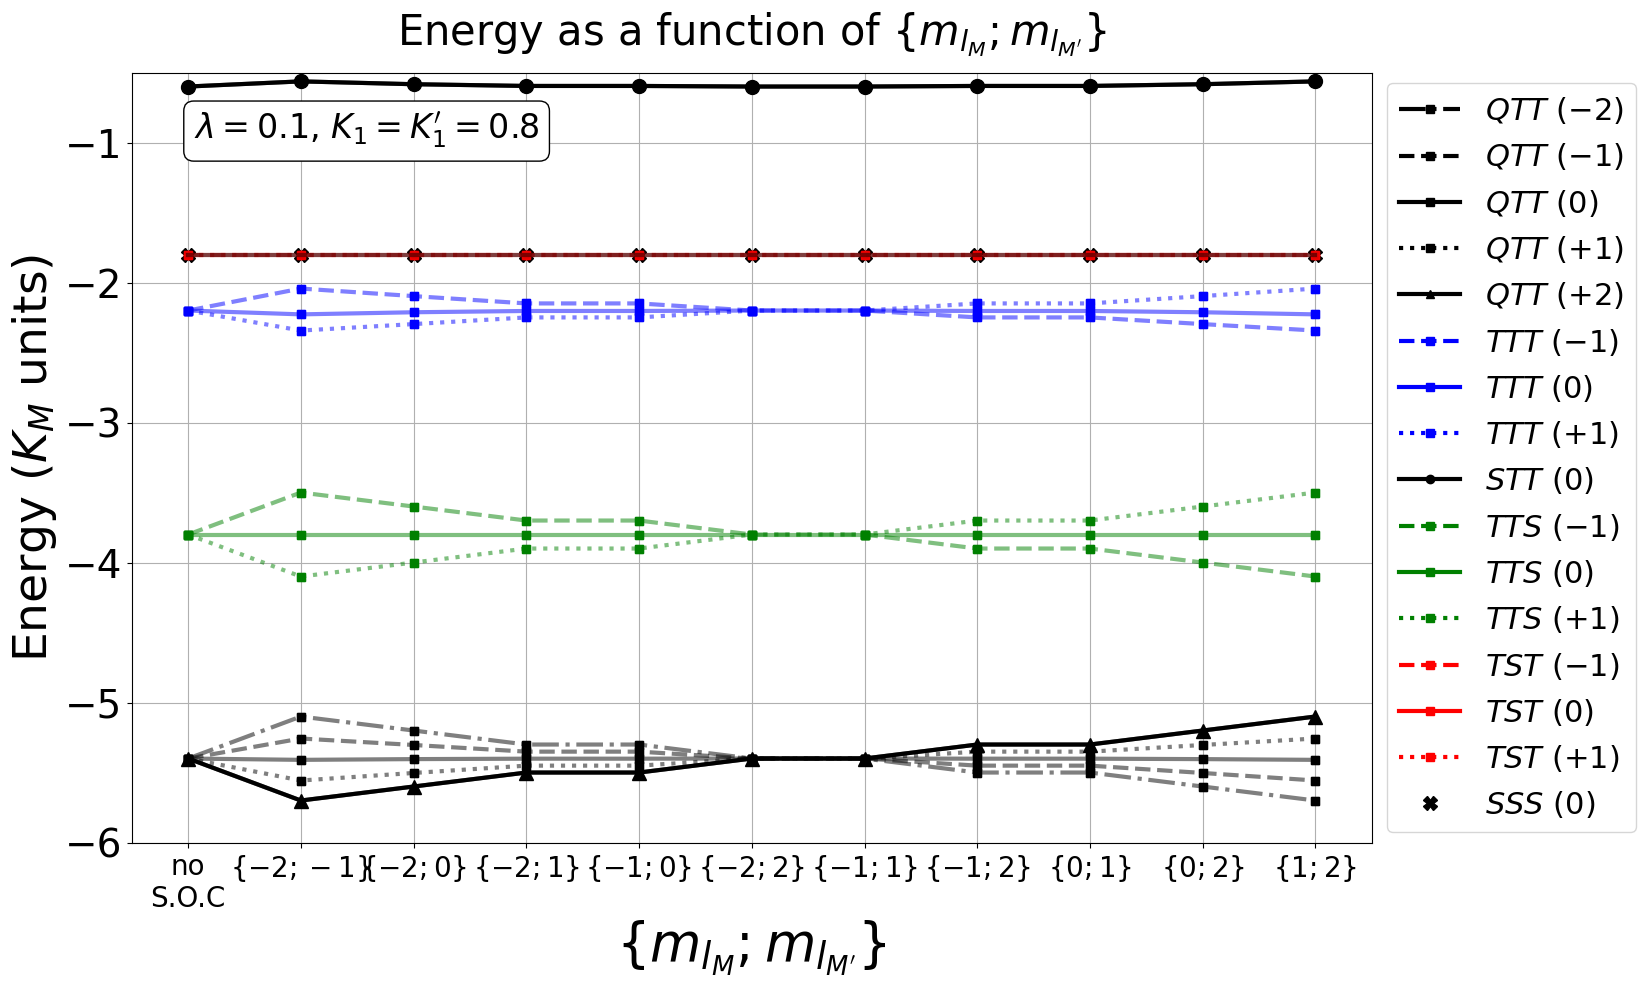

In [5]:
# It will generate a pdf Figure named 
name_file = "K1_"+str(K_M0L2)+"_K1p_"+str(np.round(K_M1L2,7))+"_comb_ml_ml_full"+".pdf"

# Indices of states to be plotted
states = [i for i in range(16)]

# Min and Max on y axis
ymin = -6. 
ymax = -0.5 
# Label of each {ml,ml'}
label_y = ["no\nS.O.C","$\\{-2;-1\\}$","$\\{-2;0\\}$","$\\{-2;1\\}$","$\\{-1;0\\}$","$\\{-2;2\\}$","$\\{-1;1\\}$","$\\{-1;2\\}$","$\\{0;1\\}$","$\\{0;2\\}$","$\\{1;2\\}$"]

# Font size
plt.rc('axes',titlesize=30)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=28)
plt.rc('legend',fontsize=22)    
plot_graph_mlml(lambd,all_energies,label_y,
                ymin,ymax,
                K_M0L2,K_M1L2,states,
                name_file,save=True)

## Figure SI2: Energy = f($Q$), $\lambda = 0.0$
Energies ($K_M$ units) of the $TTT$ ($0, \pm 1$), $STT$ ($0$) and $TST$ ($0, \pm 1$) states as a function of the dimensionless parameter $Q=\frac{K_1'-K_1}{2(K_M-K_1)}$. $\lambda = 0.0$ (\textit{i.e.} no spin-orbit),  $ \{m_{l_{M}};m_{l_{M'}}\} = \{-2,-1\}$. The flip of the states natures can be observed by the color changes, here at $Q = 1.0$. Different values for $K_1$ (from top left to bottom right): $0.1$, $0.2$, $0.3$, $0.4$, $0.5$ and $0.8$.

In [6]:
plt.rcParams['axes.grid'] = True
plt.rc('axes',titlesize=30)
plt.rc('xtick',labelsize=28)
plt.rc('ytick',labelsize=28)
plt.rc('legend',fontsize=22)

##### Parameters of the Hamiltonian

In [7]:
# Number of MOs and of electrons
N_MO = N_elec = 4
dim_H  = math.comb( 2*N_MO, N_elec ) # Dimension of the many-body space 
# Index of the metal MOs
index_metal  = [ 0, 1 ]
# Index of the ligand MOs
index_ligand = [ 2, 3 ] 
#--- S.O.C parameters
# l_metal is the azimutal quantum number (1:p, 2:d, 3:f, 4:g)
l_metal = 2 
# metal_l are the local angular momentum of each MO on the metal
metal_l = [-2.,-1.0]
#---
# I rename the values to paste them into the code
list_mo_local, l_local, list_l_local = index_metal, l_metal, metal_l

#------------- GLOBAL -------------
# Build the many-body basis            
nbody_basis = qnb.fermionic.tools.build_nbody_basis( N_MO, N_elec )     
# Build the matrix representation of the a_dagger_a operator in the many-body basis                       
a_dagger_a  = qnb.fermionic.tools.build_operator_a_dagger_a( nbody_basis ) 
# Build the matrix representation of the global S2, S_z and S_plus spin operators in the many-body basis  
S2, S_Z, S_p = qnb.fermionic.tools.build_s2_sz_splus_operator( a_dagger_a )
#------------- LOCAL -------------
# Build the matrix representation of the local S2, S_z and S_plus spin operators (metal) in the many-body basis  
S2_metal, S_z_metal, S_plus_metal  = qnb.fermionic.tools.build_local_s2_sz_splus_operator( a_dagger_a, 
                                                                                          index_metal )
# Build the matrix representation of the local S2, S_z and S_plus spin operators (ligand) in the many-body basis  
S2_ligand, S_z_ligand, S_plus_ligand = qnb.fermionic.tools.build_local_s2_sz_splus_operator( a_dagger_a, 
                                                                                            index_ligand )
# Build the matrix representation of the local triplet projection (metal) in the many-body basis  
Proj_triplet_metal = qnb.fermionic.tools.build_spin_subspaces(S2_metal, 2)
# Build the matrix representation of the local triplet projection (ligand) in the many-body basis  
Proj_triplet_ligand = qnb.fermionic.tools.build_spin_subspaces(S2_ligand, 2)

# Build the matrix representation of the penalty operator: penalty applied to the doubly occupied determinants
penalty    = 1e3 
Op_penalty = scipy.sparse.csr_matrix((np.shape(nbody_basis)[0],np.shape(nbody_basis)[0]))
for p in range(0,N_MO): 
    Op_penalty += 1*((a_dagger_a[2*p,2*p]+a_dagger_a[2*p+1,2*p+1]) == 2)

#------------- PARAMETERS OF THE SYSTEM --------------
# Energy of each MO
h00,h11,h22,h33 = 0., 0.5, -1.0, -0.7   # metal, metal', ligand1, ligand2
# K_M, K_LL
K_M0M1, K_L2L3 = 1, 1e-5
# K_ML
K_M0L2 = K_M0L3 = 0.8
# K_M'L
K_M1L2 = K_M1L3 = 1.2 
## U and t
U_M, U_L = 10., 10. 
t_M, t_L, t_ML = 0, 0, 0 

##### Calculation and plotting of Figure SI2

K_1 = 0.1 generated
K_1 = 0.2 generated
K_1 = 0.3 generated
K_1 = 0.4 generated
K_1 = 0.5 generated
K_1 = 0.8 generated


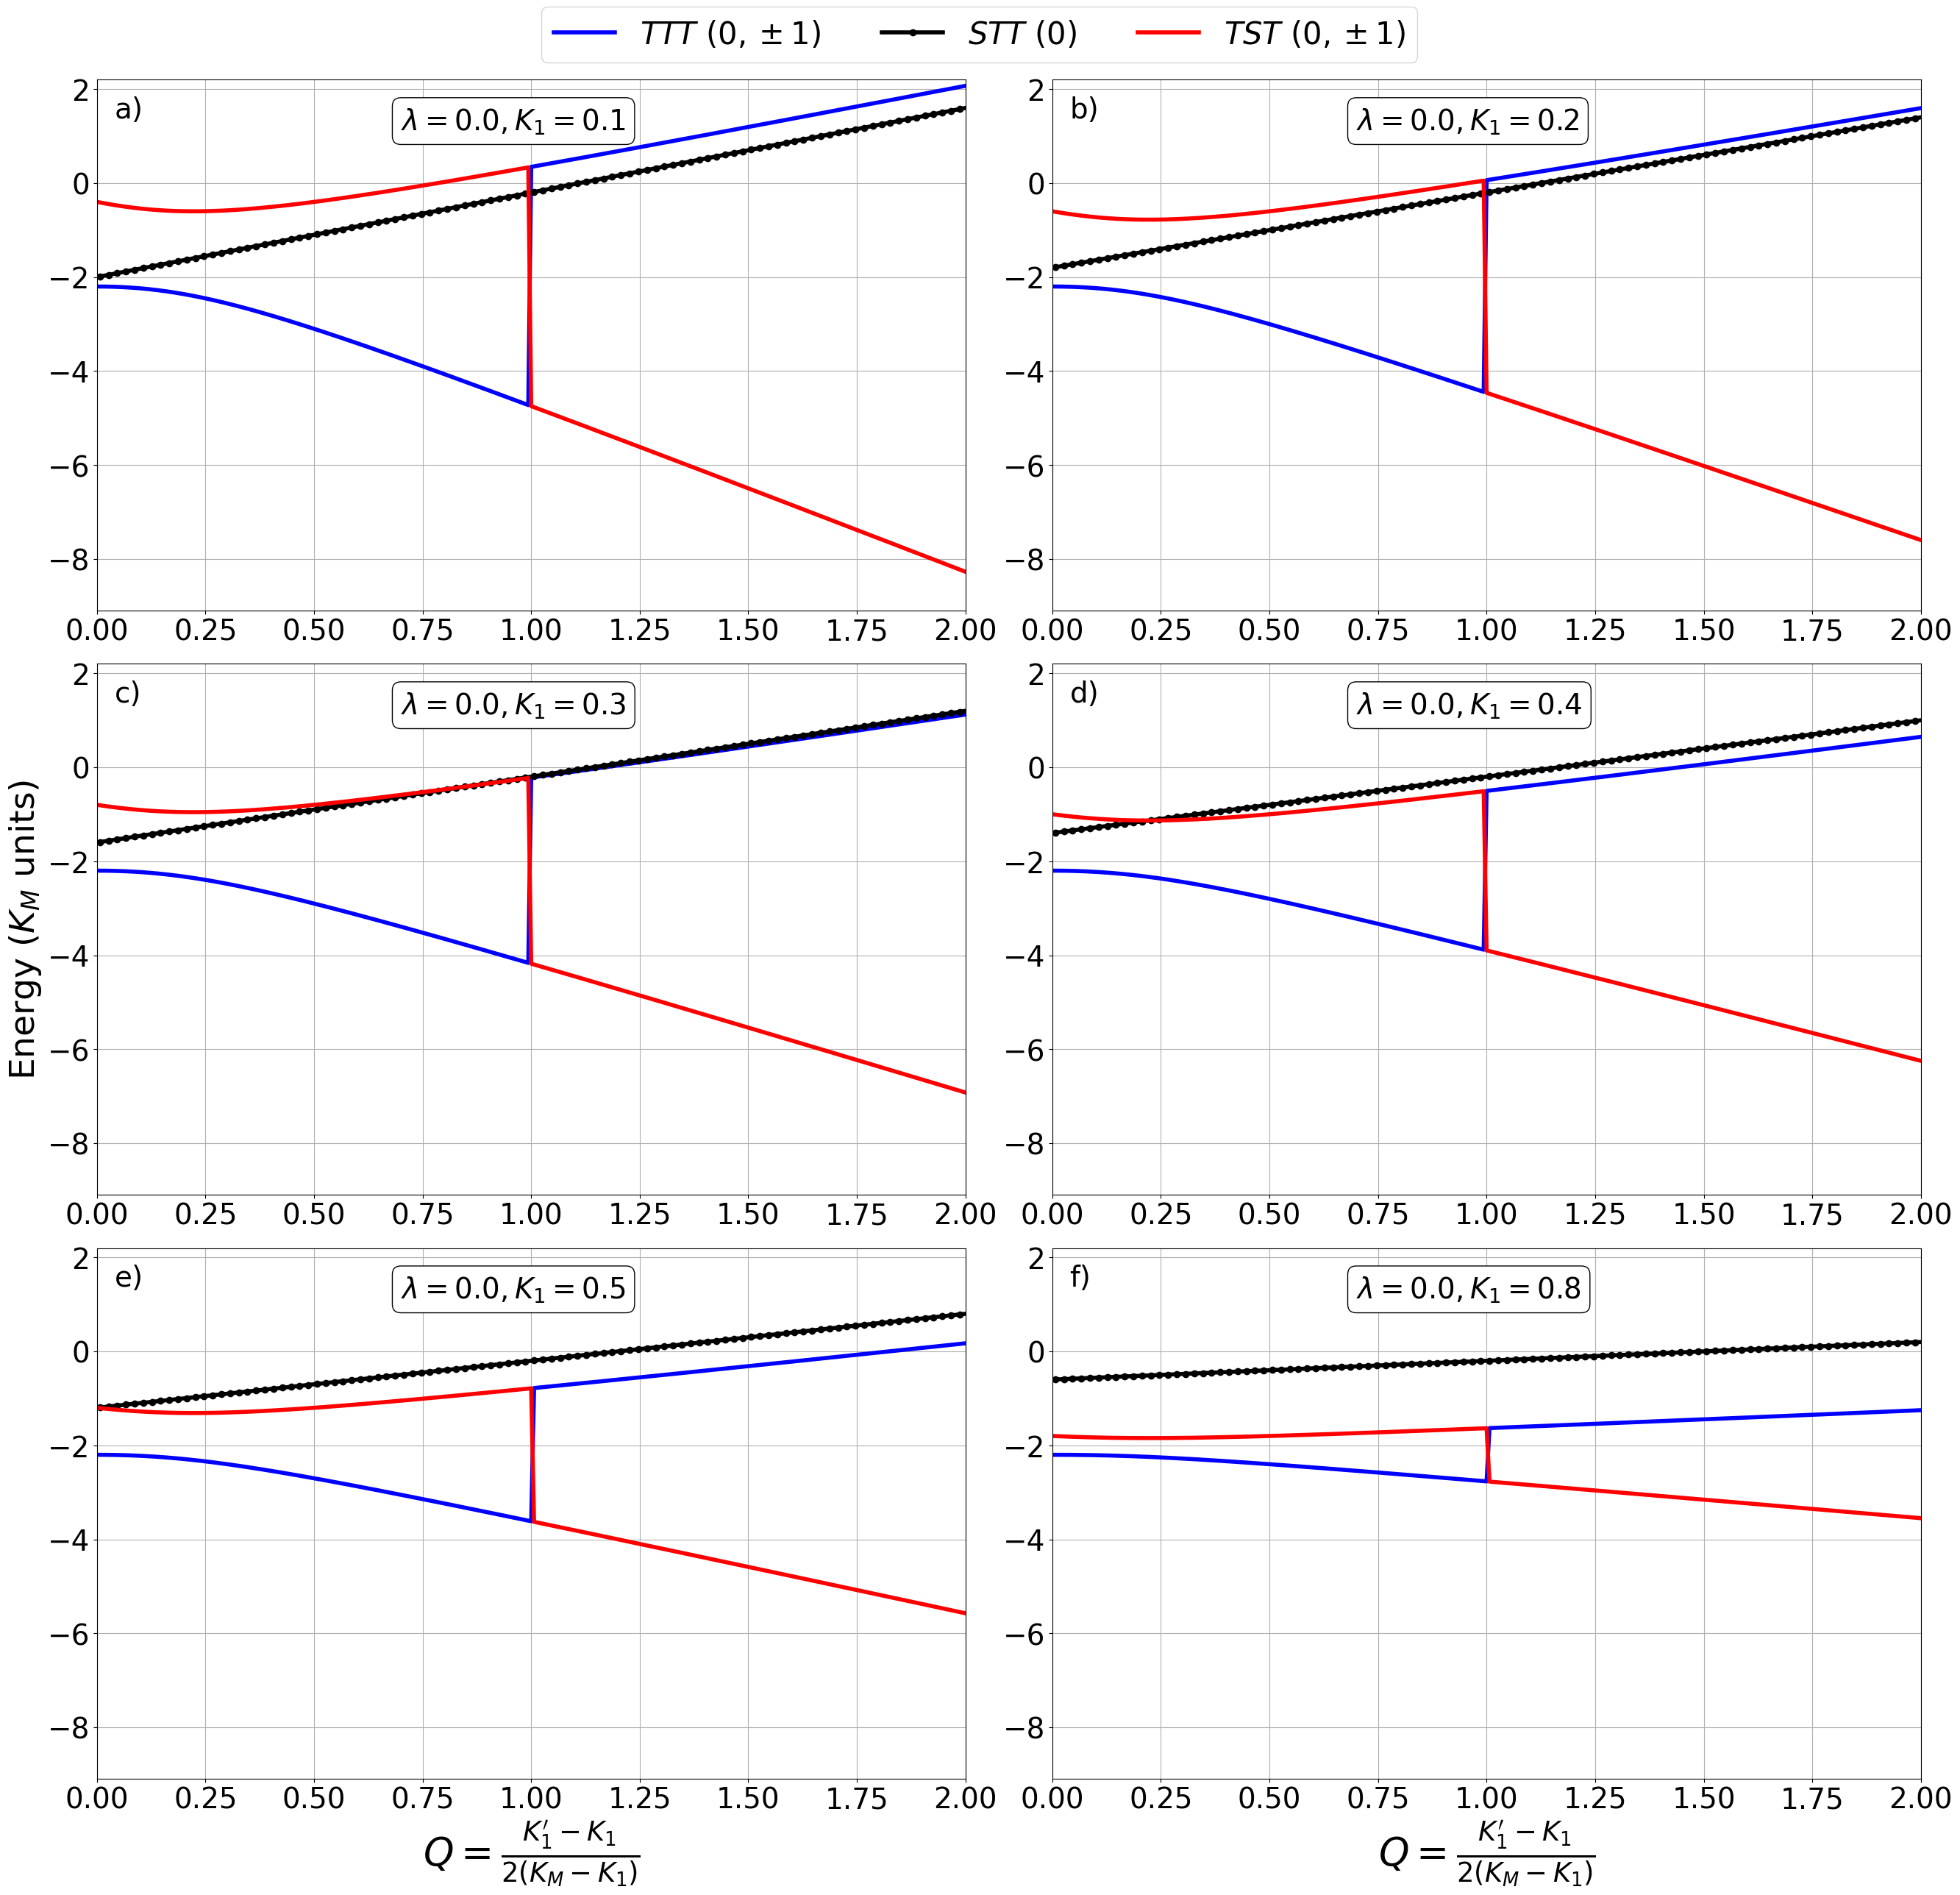

In [8]:
# Size of Figure
fig = plt.figure(figsize=(32,30))
gs = fig.add_gridspec(nrows=3, ncols=2,hspace=0.1,wspace=0.1)
ax = gs.subplots()

# Value of lambda (SOC)
## 1-2 lines, FIGURE SI2
lambd = 0.0
states= [6,8,13]
# lambd = 0.1
# states= [5,6,7,8,12,13,14]
## K_1 points
K_val = np.array([[0.1,0.3,0.5],[0.2,0.4,0.8]])

txt_label = np.array([["a)","c)","e)"],["b)","d)","f)"]])

ymin=np.array([[-9.1]*3]*2)
ymax=np.array([[2.2]*3]*2)

size_linewidth = 4

# Minimum value of Q
xmin=0.
# Maximum value of Q
xmax=2.
# Number of steps
pas= xmax/300
# Variation of Q as a list
Q_var = [np.round(val,15) for val in np.arange(xmin,xmax+pas,pas)]


x_txt = 0.35
y_txt = 0.95

ax[2,0].set_xlabel("$Q = \\frac{K_1^{\\prime} - K_1}{2(K_M-K_1)}$",fontsize=38)
ax[2,1].set_xlabel("$Q = \\frac{K_1^{\\prime} - K_1}{2(K_M-K_1)}$",fontsize=38)
ax[1,0].set_ylabel("Energy ($K_M$ units)",fontsize=34)


for ax_idx_row in range(3):
    for ax_idx_col in range(2):
        textstr = "$\\lambda = "+str(lambd)+",K_1 ="+str(K_val[ax_idx_col, ax_idx_row])+"$"
                                                                
        ax[ax_idx_row, ax_idx_col].text(x_txt,y_txt, textstr,transform=ax[ax_idx_row, ax_idx_col].transAxes, fontsize=28,
                verticalalignment='top',bbox=dict(boxstyle='round',facecolor='white'))
        
        # a, b...
        ax[ax_idx_row, ax_idx_col].text(0.02,0.97, txt_label[ax_idx_col, ax_idx_row],transform=ax[ax_idx_row, ax_idx_col].transAxes, fontsize=28,
                verticalalignment='top')#,bbox=dict(boxstyle='round',facecolor='white'))
        
        ax[ax_idx_row, ax_idx_col].set_xlim([xmin, xmax])
        ax[ax_idx_row, ax_idx_col].set_ylim([ymin[ax_idx_col, ax_idx_row], ymax[ax_idx_col, ax_idx_row]])
        
        y = Q_var
        
        # Label of each state
        if lambd == 0.0:
            label_list = ["$QTT$ $(0, \\pm1, \\pm2)$"]*5 +\
                          ["$TTT$ $(0, \\pm1)$"]*3 +\
                          ["$STT$ $(0)$"]+\
                          ["$TTS$ $(0, \\pm1)$"]*3+\
                          ["$TST$ $(0, \\pm1)$"]*3+\
                          ["$SSS$ $(0)$"]
        else:
            label_list = ["$QTT$ $(-2)$", "$QTT$ $(-1)$", "$QTT$ $(0)$", "$QTT$ $(+1)$", "$QTT$ $(+2)$", 
                          "$TTT$ $(-1)$", "$TTT$ $(0)$", "$TTT$ $(+1)$", 
                          "$STT$ $(0)$", 
                          "$TTS$ $(-1)$", "$TTS$ $(0)$", "$TTS$ $(+1)$", 
                          "$TST$ $(-1)$", "$TST$ $(0)$", "$TST$ $(+1)$", 
                          "$SSS$ $(0)$"]
        
        # Linestyle of each state
        linestyles = ["dashdot","dashed","solid","dotted","dashdot",
                      "dashed","solid","dotted",
                      "solid",
                      "dashed","solid","dotted",
                      "dashed","solid","dotted"]
        colors = []
        palette = ["black",
                  "blue",
                  "green",
                  "red"]
        colors = [palette[0]]*5+[palette[1]]*3+[palette[0]]+[palette[2]]*3+[palette[3]]*3+[palette[0]]
        
        
        K_M0L2 = K_M0L3 = K_val[ax_idx_col, ax_idx_row]
        # Initialize the array for the eigenvalues
        all_energies = np.zeros((16,len(Q_var)))
        # Initialize the array for [m_s, S(S+1),%S_M=1,%S_L=1]
        all_proj_SPIN = np.zeros((len(all_energies),len(Q_var),4))
        K_list = []
        for Q_val in range(len(Q_var)):
            K_M1L2 = K_M1L3 = np.round(2*Q_var[Q_val]* (K_M0M1 - K_M0L2) + K_M0L2,15)
            K_list.append(K_M1L2)
            h_, g_ = build_basis(N_MO, index_metal, index_ligand,
                                  h00,h11,h22,h33,
                                  K_M0M1,K_L2L3,K_M0L2,K_M0L3,K_M1L2,K_M1L3,
                                  U_M,U_L,t_M,t_L,t_ML)
            # Build the matrix representation of several interesting spin operators in the many-body basis  
            S_2, S_Z, S_p = qnb.fermionic.tools.build_s2_sz_splus_operator( a_dagger_a ) 
            # Build the matrix representation of the Hamiltonian operator
            H = qnb.fermionic.tools.build_hamiltonian_quantum_chemistry(
                h_, g_, nbody_basis, a_dagger_a)
            # Build the matrix representation of the Spin-Orbit Hamiltonian operator 
            H_SO = qnb.fermionic.tools.build_local_spinorbit_lz(a_dagger_a, list_mo_local,l_local, list_l_local)
            H_tot = H + lambd * H_SO
            eigval_SO, eigvec_SO = scipy.linalg.eigh( H_tot.toarray()  ) 
            # Specific function constructed by Pablo   
            all_energies, all_proj_SPIN = curve_analysis_spin(Q_val, all_energies, all_proj_SPIN, eigval_SO, eigvec_SO, 
                                                S_Z, S_2, Proj_triplet_metal, Proj_triplet_ligand,
                                                Op_penalty,penalty,use_index=True)
    
        x = all_energies #we want Proj_SM
        
        final_label_list = []
        lines = []
        for i in states:
            if i == 8:
                line, = ax[ax_idx_row, ax_idx_col].plot(y,x[i],linestyle=linestyles[i], marker='o', color=colors[i],
                          linewidth=size_linewidth,
                          markevery=[j for j in range(len(y)) if j%((len(y)-1)/100) ==1])
            elif i == 15:
                line, = ax[ax_idx_row, ax_idx_col].plot(y,x[i],'x', color=colors[i])
            else:
                line, = ax[ax_idx_row, ax_idx_col].plot(y,x[i],linestyle=linestyles[i], color=colors[i],
                        linewidth=size_linewidth)
            lines += [line]
        print("K_1 = "+str(K_val[ax_idx_col, ax_idx_row])+" generated")
# Legend
fig.legend(handles=lines,labels=[label_list[i] for i in states], 
                bbox_to_anchor=(0.5,0.92),
               loc='upper center', 
               ncol = 7,
               fontsize=30)
# Save figure
plt.savefig("lambda"+str(lambd)+"variation_K_ProjSM-"+"special"+"_energy.pdf", bbox_inches='tight')

plt.show()

## Table SI1: $\Delta E_2$, $\Delta E_3$ at $Q = 10.0$, $\lambda = 0.0$
Energy ($K_M$ units) differences between the $TST$ and $TTT$ multiplets, $\Delta E_2 = E(TST) - E(TTT)$, and the $STT$ and $TTT$ multiplets, $\Delta E_3 = E(STT) - E(TTT)$, for $Q = 10.0$. $\lambda = 0.0$ (\textit{i.e.} no spin-orbit),  $ \{m_{l_{M}};m_{l_{M'}}\} = \{-2,-1\}$. The selected $K_1$ values are the ones used throughout the inspections and given in Figure SI2. 

In [9]:
K_var = [0.1,0.2,0.3,0.4,0.5,0.8]
# Value of lambda
lambd = 0.0
Q = 10.0

# Initialize the array for the eigenvalues
all_energies = np.zeros((16,len(K_var)))
# Initialize the array for [m_s, S(S+1),%S_M=1,%S_L=1]
all_proj_SPIN = np.zeros((len(all_energies),len(K_var),4))
# Storage of K_1' values
K_list = []

for K_val in range(len(K_var)):
    K_M0L2 = K_M0L3 = K_var[K_val]
    # Calculate the K_1' value associated to the value of Q for K_1 fixed
    K_M1L2 = K_M1L3 = np.round(2*Q* (K_M0M1 - K_M0L2) + K_M0L2,15)
    ## Stores the values of K_1'
    K_list.append(K_M1L2)
    # Update the one- and two-electron matrices
    h_, g_ = build_basis(N_MO, index_metal, index_ligand,
                         h00,h11,h22,h33,K_M0M1,K_L2L3,
                         K_M0L2,K_M0L3,K_M1L2,K_M1L3,
                         U_M,U_L,t_M,t_L,t_ML)
    # Build the matrix representation of several interesting spin operators in the many-body basis  
    S2, S_Z, S_p = qnb.fermionic.tools.build_s2_sz_splus_operator( a_dagger_a ) 
    # Build the matrix representation of the Hamiltonian operator
    H = qnb.fermionic.tools.build_hamiltonian_quantum_chemistry(
        h_, g_, nbody_basis, a_dagger_a)
    # Build the matrix representation of the Spin-Orbit Hamiltonian operator 
    H_SO = qnb.fermionic.tools.build_local_spinorbit_lz(a_dagger_a, list_mo_local,l_local, list_l_local)
    H_tot = H + lambd * H_SO
    eigval_SO, eigvec_SO = scipy.linalg.eigh( H_tot.toarray()) 
    # Specific function constructed by Pablo   
    all_energies, all_proj_SPIN = curve_analysis_spin(K_val, all_energies, all_proj_SPIN, eigval_SO, eigvec_SO, 
                                        S_Z, S2, Proj_triplet_metal, Proj_triplet_ligand,
                                        Op_penalty, penalty,use_index=True,)
for K_val in range(len(K_var)):
    K_M0L2 = K_var[K_val]
    print("K_1: ",K_M0L2,
          "\tDeltaE_2: ",np.round(all_energies[13,K_val]-all_energies[6,K_val],2),
          "\tDeltaE_3: ",np.round(all_energies[8,K_val]-all_energies[6,K_val],2))

K_1:  0.1 	DeltaE_2:  -53.43 	DeltaE_3:  -0.41
K_1:  0.2 	DeltaE_2:  -47.49 	DeltaE_3:  -0.15
K_1:  0.3 	DeltaE_2:  -41.55 	DeltaE_3:  0.12
K_1:  0.4 	DeltaE_2:  -35.62 	DeltaE_3:  0.39
K_1:  0.5 	DeltaE_2:  -29.68 	DeltaE_3:  0.66
K_1:  0.8 	DeltaE_2:  -11.87 	DeltaE_3:  1.46


## Figure SI3: Energy = f($Q$), $\lambda = 0.1$
Energies ($K_M$ units) of the $TTT$ ($0, \pm 1$), $STT$ ($0$) and $TST$ ($0, \pm 1$) states as a function of the dimensionless parameter $Q=\frac{K_1'-K_1}{2(K_M-K_1)}$. $\lambda = 0.1$, $ \{m_{l_{M}};m_{l_{M'}}\} = \{-2,-1\}$. Different $K_1$ values (from top left to bottom right): $0.1$, $0.2$, $0.3$, $0.4$, $0.5$ and $0.8$.

##### Calculation and plotting of Figure SI3

K_1 = 0.1 generated
K_1 = 0.2 generated
K_1 = 0.3 generated
K_1 = 0.4 generated
K_1 = 0.5 generated
K_1 = 0.8 generated


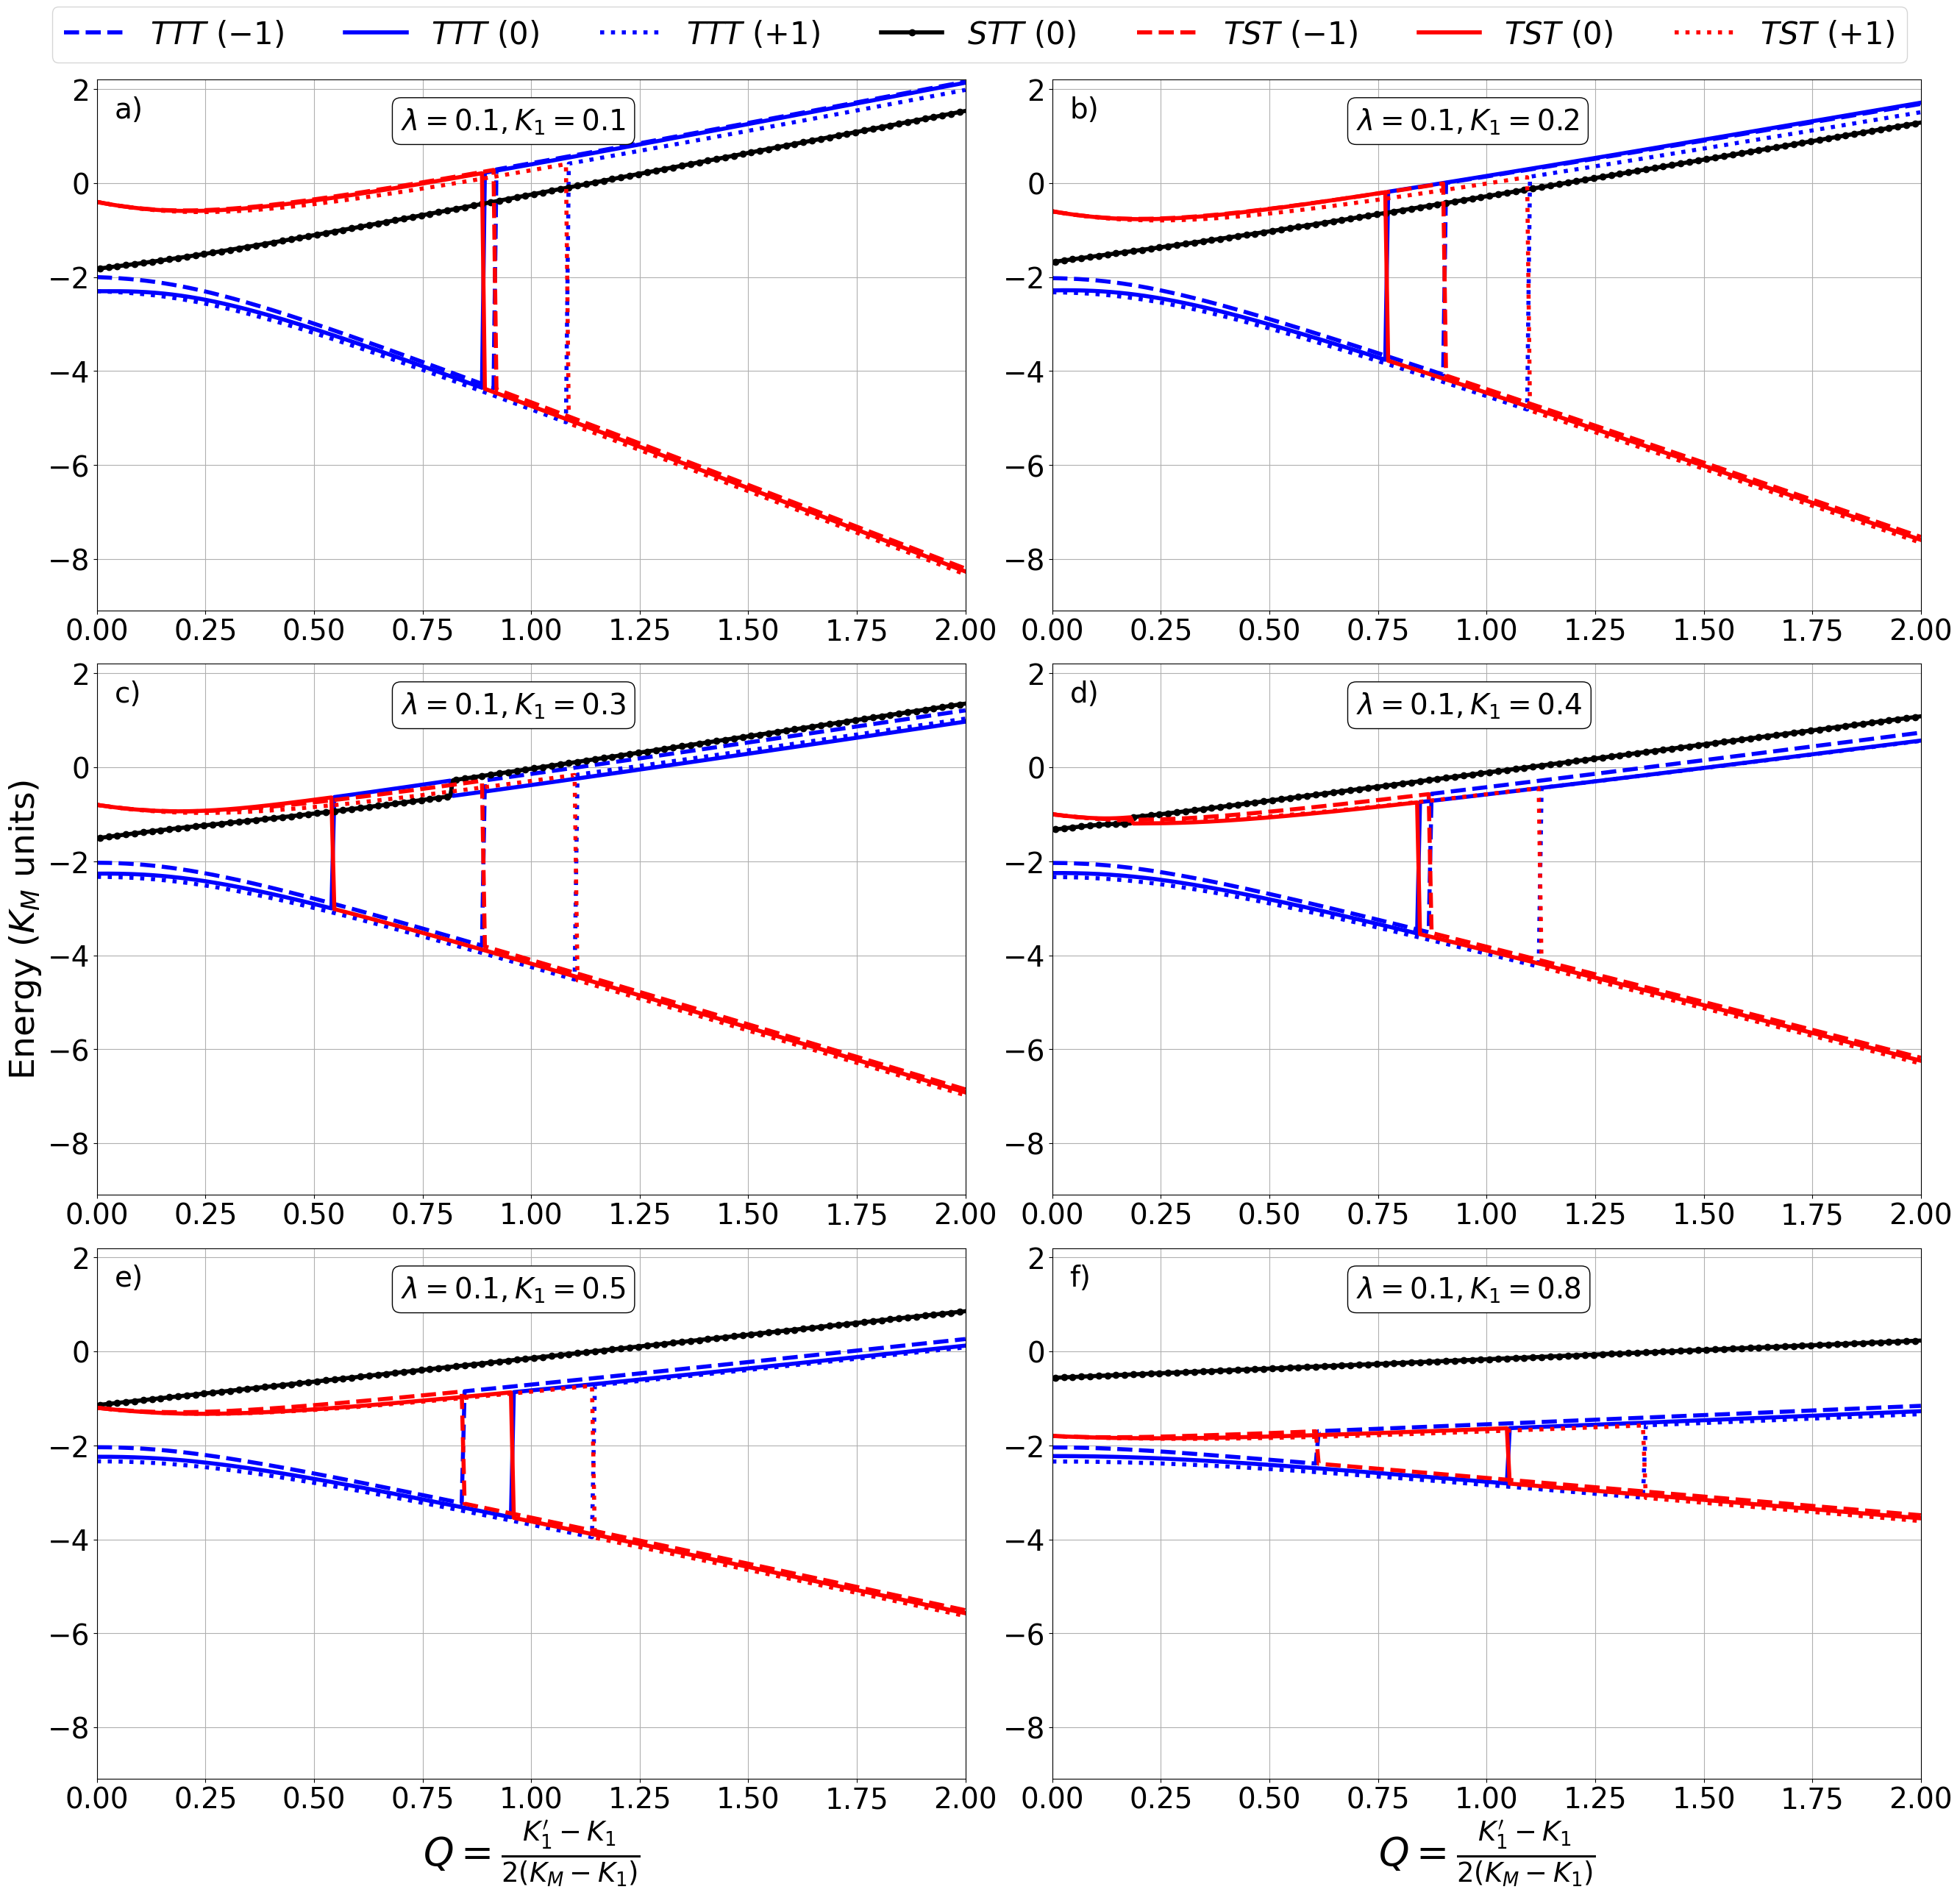

In [10]:
# Size of Figure
fig = plt.figure(figsize=(32,30))
gs = fig.add_gridspec(nrows=3, ncols=2,hspace=0.1,wspace=0.1)
ax = gs.subplots()

# Value of lambda (SOC)
## 1-2 lines, FIGURE SI2
lambd = 0.1
states= [5,6,7,8,12,13,14]
## K_1 points
K_val = np.array([[0.1,0.3,0.5],[0.2,0.4,0.8]])

txt_label = np.array([["a)","c)","e)"],["b)","d)","f)"]])

ymin=np.array([[-9.1]*3]*2)
ymax=np.array([[2.2]*3]*2)

size_linewidth = 4

# Minimum value of Q
xmin=0.
# Maximum value of Q
xmax=2.
# Number of steps
pas= xmax/300
# Variation of Q as a list
Q_var = [np.round(val,15) for val in np.arange(xmin,xmax+pas,pas)]


x_txt = 0.35
y_txt = 0.95

ax[2,0].set_xlabel("$Q = \\frac{K_1^{\\prime} - K_1}{2(K_M-K_1)}$",fontsize=38)
ax[2,1].set_xlabel("$Q = \\frac{K_1^{\\prime} - K_1}{2(K_M-K_1)}$",fontsize=38)
ax[1,0].set_ylabel("Energy ($K_M$ units)",fontsize=34)


for ax_idx_row in range(3):
    for ax_idx_col in range(2):
        textstr = "$\\lambda = "+str(lambd)+",K_1 ="+str(K_val[ax_idx_col, ax_idx_row])+"$"
                                                                
        ax[ax_idx_row, ax_idx_col].text(x_txt,y_txt, textstr,transform=ax[ax_idx_row, ax_idx_col].transAxes, fontsize=28,
                verticalalignment='top',bbox=dict(boxstyle='round',facecolor='white'))
        
        # a, b...
        ax[ax_idx_row, ax_idx_col].text(0.02,0.97, txt_label[ax_idx_col, ax_idx_row],transform=ax[ax_idx_row, ax_idx_col].transAxes, fontsize=28,
                verticalalignment='top')#,bbox=dict(boxstyle='round',facecolor='white'))
        
        ax[ax_idx_row, ax_idx_col].set_xlim([xmin, xmax])
        ax[ax_idx_row, ax_idx_col].set_ylim([ymin[ax_idx_col, ax_idx_row], ymax[ax_idx_col, ax_idx_row]])
        
        y = Q_var
        
        # Label of each state
        if lambd == 0.0:
            label_list = ["$QTT$ $(0, \\pm1, \\pm2)$"]*5 +\
                          ["$TTT$ $(0, \\pm1)$"]*3 +\
                          ["$STT$ $(0)$"]+\
                          ["$TTS$ $(0, \\pm1)$"]*3+\
                          ["$TST$ $(0, \\pm1)$"]*3+\
                          ["$SSS$ $(0)$"]
        else:
            label_list = ["$QTT$ $(-2)$", "$QTT$ $(-1)$", "$QTT$ $(0)$", "$QTT$ $(+1)$", "$QTT$ $(+2)$", 
                          "$TTT$ $(-1)$", "$TTT$ $(0)$", "$TTT$ $(+1)$", 
                          "$STT$ $(0)$", 
                          "$TTS$ $(-1)$", "$TTS$ $(0)$", "$TTS$ $(+1)$", 
                          "$TST$ $(-1)$", "$TST$ $(0)$", "$TST$ $(+1)$", 
                          "$SSS$ $(0)$"]
        
        # Linestyle of each state
        linestyles = ["dashdot","dashed","solid","dotted","dashdot",
                      "dashed","solid","dotted",
                      "solid",
                      "dashed","solid","dotted",
                      "dashed","solid","dotted"]
        colors = []
        palette = ["black",
                  "blue",
                  "green",
                  "red"]
        colors = [palette[0]]*5+[palette[1]]*3+[palette[0]]+[palette[2]]*3+[palette[3]]*3+[palette[0]]
        
        
        K_M0L2 = K_M0L3 = K_val[ax_idx_col, ax_idx_row]
        # Initialize the array for the eigenvalues
        all_energies = np.zeros((16,len(Q_var)))
        # Initialize the array for [m_s, S(S+1),%S_M=1,%S_L=1]
        all_proj_SPIN = np.zeros((len(all_energies),len(Q_var),4))
        K_list = []
        for Q_val in range(len(Q_var)):
            K_M1L2 = K_M1L3 = np.round(2*Q_var[Q_val]* (K_M0M1 - K_M0L2) + K_M0L2,15)
            K_list.append(K_M1L2)
            h_, g_ = build_basis(N_MO, index_metal, index_ligand,
                                  h00,h11,h22,h33,
                                  K_M0M1,K_L2L3,K_M0L2,K_M0L3,K_M1L2,K_M1L3,
                                  U_M,U_L,t_M,t_L,t_ML)
            # Build the matrix representation of several interesting spin operators in the many-body basis  
            S_2, S_Z, S_p = qnb.fermionic.tools.build_s2_sz_splus_operator( a_dagger_a ) 
            # Build the matrix representation of the Hamiltonian operator
            H = qnb.fermionic.tools.build_hamiltonian_quantum_chemistry(
                h_, g_, nbody_basis, a_dagger_a)
            # Build the matrix representation of the Spin-Orbit Hamiltonian operator 
            H_SO = qnb.fermionic.tools.build_local_spinorbit_lz(a_dagger_a, list_mo_local,l_local, list_l_local)
            H_tot = H + lambd * H_SO
            eigval_SO, eigvec_SO = scipy.linalg.eigh( H_tot.toarray()  ) 
            # Specific function constructed by Pablo   
            all_energies, all_proj_SPIN = curve_analysis_spin(Q_val, all_energies, all_proj_SPIN, eigval_SO, eigvec_SO, 
                                                S_Z, S_2, Proj_triplet_metal, Proj_triplet_ligand,
                                                Op_penalty,penalty,use_index=True)
    
        x = all_energies #we want Proj_SM
        
        final_label_list = []
        lines = []
        for i in states:
            if i == 8:
                line, = ax[ax_idx_row, ax_idx_col].plot(y,x[i],linestyle=linestyles[i], marker='o', color=colors[i],
                          linewidth=size_linewidth,
                          markevery=[j for j in range(len(y)) if j%((len(y)-1)/100) ==1])
            elif i == 15:
                line, = ax[ax_idx_row, ax_idx_col].plot(y,x[i],'x', color=colors[i])
            else:
                line, = ax[ax_idx_row, ax_idx_col].plot(y,x[i],linestyle=linestyles[i], color=colors[i],
                        linewidth=size_linewidth)
            lines += [line]
        print("K_1 = "+str(K_val[ax_idx_col, ax_idx_row])+" generated")
# Legend
fig.legend(handles=lines,labels=[label_list[i] for i in states], 
                bbox_to_anchor=(0.5,0.92),
               loc='upper center', 
               ncol = 7,
               fontsize=30)
# Save figure
plt.savefig("lambda"+str(lambd)+"variation_K_ProjSM-"+"special"+"_energy.pdf", bbox_inches='tight')

plt.show()

## Figure SI4: Proportion of local spin triplet on the metal = f($Q$), $\lambda = 0.1$, $K_1 = [0.1, 0.3, 0.5]$
Proportions of local spin triplet on the metal of the $TTT$ ($0, \pm1$), $STT$ ($0$) and $TST$ ($0, \pm1$)  states as a function of $Q=\frac{K_1'-K_1}{2(K_M-K_1)}$. States with dominance  $M_{S_{tot}} = 0$, $M_{S_{tot}} = +1$ and $M_{S_{tot}} = -1$ are shown in the upper, middle, and lower panels, respectively. $\lambda = 0.1$, $\{m_{l_{M}};m_{l_{M'}}\} = \{-2,-1\}$ and $K_1 = 0.1$ (circles, $\bigcirc$), $K_1 = 0.3$ (triangles, $\triangle$) and $K_1 = 0.5$ (squares, $\square$).

This code is adaptative, it can plot either the **proportion of local spin triplet on the metal** ("SM") (= Figure 5), the *proportion of local spin triplet on the ligand* ("SL"), the *total spin projection* ("Sz") or the *eigenvalues of the total spin* ("S2").

It plots 3 values of $K_1$ in a (1x3) fashion. The $K_1$ values can be changed by providing a different "K_val" list.  

##### Calculation of data and plotting of Figure SI4

K_1 = 0.1 generated
K_1 = 0.3 generated
K_1 = 0.5 generated


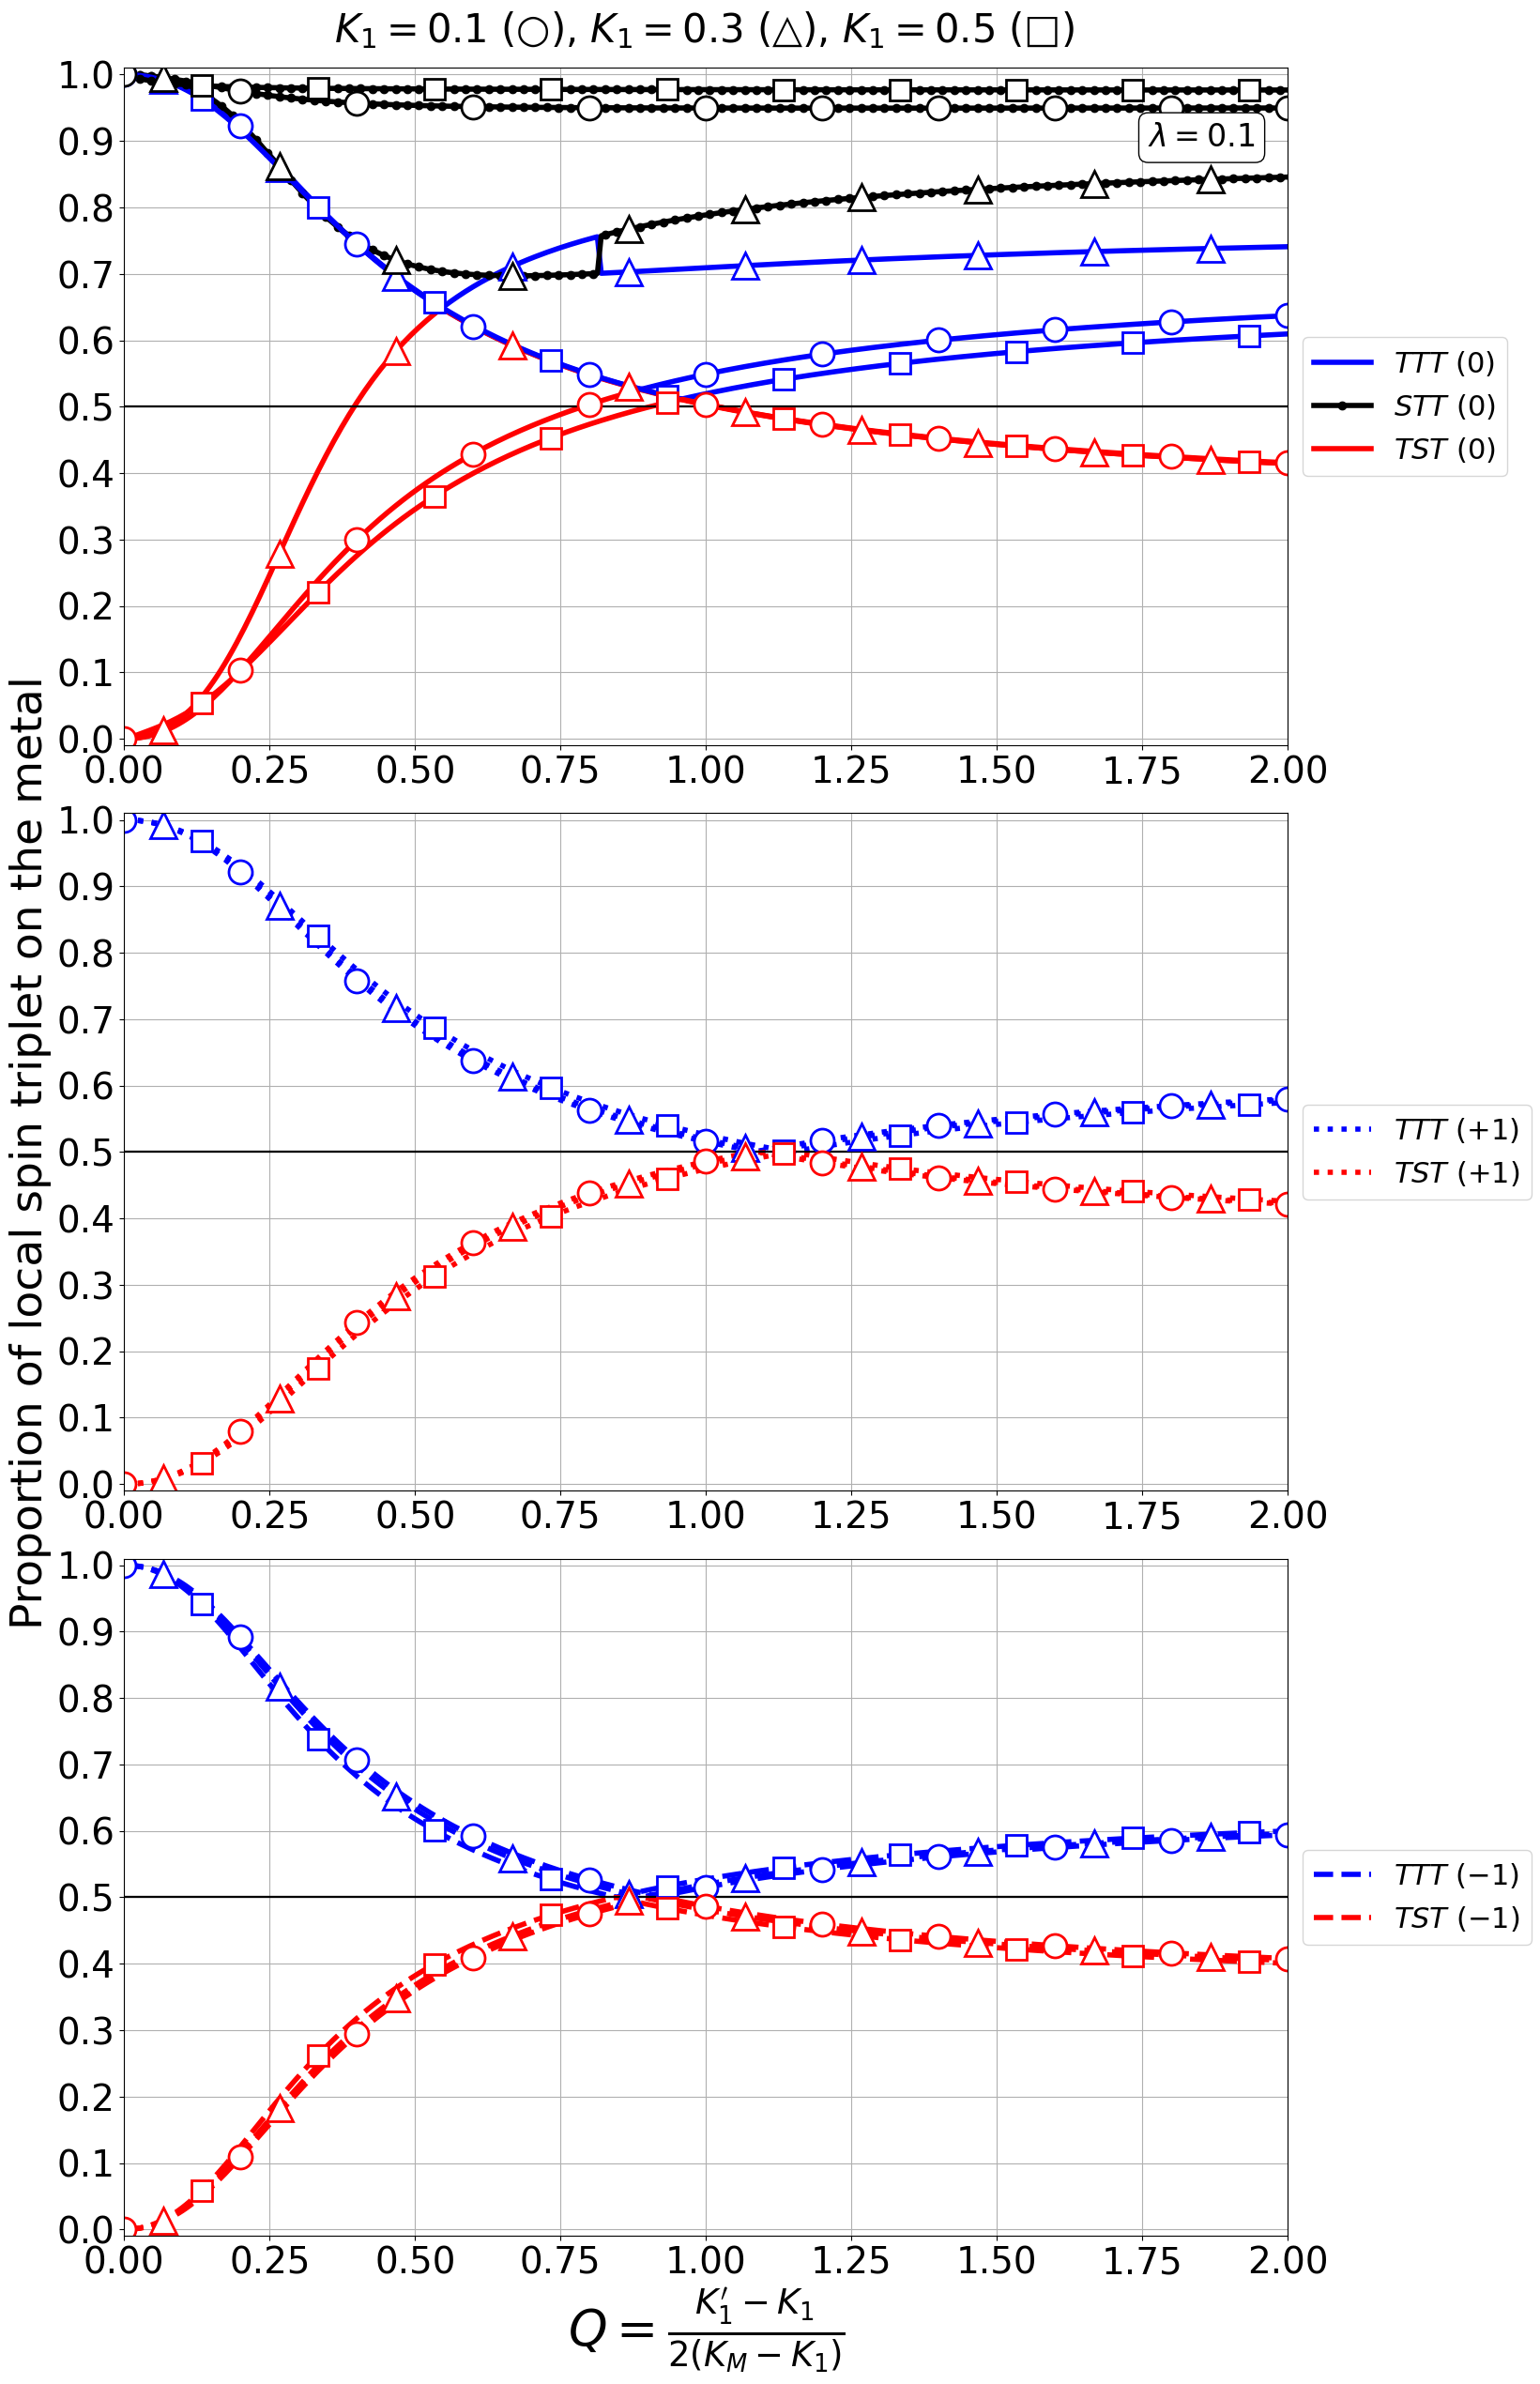

In [11]:
# Size of Figure
fig = plt.figure(figsize=(16,30))
gs = fig.add_gridspec(3,hspace=0.1)
ax = gs.subplots()

# Values of K_1
K_val = [0.1,0.3,0.5]

# Value of lambda (SOC)
lambd = 0.1

statess = [[6,8,13],[7,14],[5,12]]

level = "SM"
# level = "SL"
# level = "Sz"
# level = "S2"
if level == "SM":
    ax[1].set_ylabel("Proportion of local spin triplet on the metal",fontsize=34)
    ymin=-0.01
    ymax=1.01
    mintick,maxtick,padtick = ymin+0.01,ymax+0.01, 0.1
elif level == "SL":
    ax[1].set_ylabel("Proportion of local spin triplet on the ligand",fontsize=34)
    ymin=-0.01
    ymax=1.01
    mintick,maxtick,padtick = ymin+0.01,ymax+0.01, 0.1
elif level == "Sz":
    ax[1].set_ylabel("$M_{S_{tot}}$",fontsize=34)
    ymin = -2.01
    ymax = 2.01
    mintick,maxtick,padtick = ymin+0.01,ymax+0.01, 0.5
elif level == "S2":
    ax[1].set_ylabel("$S_{tot}(S_{tot}+1)$",fontsize=34)
    ymin = -0.01
    ymax = 6.01
    mintick,maxtick,padtick = ymin+0.01,ymax+0.01, 0.5
else:
    raise ValueError("Not implemented!")

size_linewidth = 3

marker_list = ["o","^","s"]
markersize_list = [18,20,16]
# Minimum value of Q
xmin=0.
# Maximum value of Q
xmax=2
# Number of steps
pas=xmax/300
# Variation of Q as a list
Q_var = [np.round(val,15) for val in np.arange(xmin,xmax+pas,pas)]

# We only plot states TST(-1), TST(0), STT(0), TTT(-1) and TTT(0) for readability

ax[0].set_title("$K_1 = "+str(K_val[0])+"$ (\u25cb), "+ \
                "$K_1 = "+str(K_val[1])+"$ (\u25b3), " + \
                "$K_1 = "+str(K_val[2])+"$ (\u25a1) ",
                pad=20)

# Add a box of text
textstr = "$\\lambda = "+str(lambd)+"$"
if lambd == 0.1:
    if K_val[0] == 0.1:
        ax[0].text(0.88,0.92, textstr,transform=ax[0].transAxes, fontsize=24,
                verticalalignment='top',bbox=dict(boxstyle='round',facecolor='white'))
    else:
        ax[0].text(0.88,0.83, textstr,transform=ax[0].transAxes, fontsize=24,
                verticalalignment='top',bbox=dict(boxstyle='round',facecolor='white'))
else:
    ax[0].text(0.88,0.95, textstr,transform=ax[0].transAxes, fontsize=24,
            verticalalignment='top',bbox=dict(boxstyle='round',facecolor='white'))
plt.xlabel("$Q = \\frac{K_1^{\\prime} - K_1}{2(K_M-K_1)}$",fontsize=38)

for K_var in range(len(K_val)):
    K_M0L2 = K_M0L3 = K_val[K_var]
    # Initialize the array for the eigenvalues
    all_energies = np.zeros((16,len(Q_var)))
    # Initialize the array for [m_s, S(S+1),%S_M=1,%S_L=1]
    all_proj_SPIN = np.zeros((len(all_energies),len(Q_var),4))
    K_list = []
    ### CALCULATE DATA ###
    for Q_val in range(len(Q_var)):
        K_M1L2 = K_M1L3 = np.round(2*Q_var[Q_val]* (K_M0M1 - K_M0L2) + K_M0L2,15)
        K_list.append(K_M1L2)
        h_, g_ = build_basis(N_MO, index_metal, index_ligand,
                              h00,h11,h22,h33,
                              K_M0M1,K_L2L3,K_M0L2,K_M0L3,K_M1L2,K_M1L3,
                              U_M,U_L,t_M,t_L,t_ML)
        # Build the matrix representation of several interesting spin operators in the many-body basis  
        S_2, S_Z, S_p = qnb.fermionic.tools.build_s2_sz_splus_operator( a_dagger_a ) 
        # Build the matrix representation of the Hamiltonian operator
        H = qnb.fermionic.tools.build_hamiltonian_quantum_chemistry(
            h_, g_, nbody_basis, a_dagger_a)
        # Build the matrix representation of the Spin-Orbit Hamiltonian operator 
        H_SO = qnb.fermionic.tools.build_local_spinorbit_lz(a_dagger_a, list_mo_local,l_local, list_l_local)
        H_tot = H + lambd * H_SO
        eigval_SO, eigvec_SO = scipy.linalg.eigh( H_tot.toarray()  ) 
        # Specific function constructed by Pablo   
        all_energies, all_proj_SPIN = curve_analysis_spin(Q_val, all_energies, all_proj_SPIN, eigval_SO, eigvec_SO, 
                                            S_Z, S_2, Proj_triplet_metal, Proj_triplet_ligand,
                                            Op_penalty,penalty,use_index=True)
    ### PLOT DATA ###
    for ax_idx in range(3):    
        states= statess[ax_idx]
        ax[ax_idx].set_xlim([xmin, xmax])
        ax[ax_idx].set_ylim([ymin, ymax])
        # y ticks separated by 0.1
        ax[ax_idx].set_yticks(np.arange(mintick,maxtick,padtick))
        
        y = Q_var
        # Size of lines
        size_linewidth = 4
        # Label of each state
        label_list = ["$QTT$ $(-2)$", "$QTT$ $(-1)$", "$QTT$ $(0)$", "$QTT$ $(+1)$", "$QTT$ $(+2)$", 
                      "$TTT$ $(-1)$", "$TTT$ $(0)$", "$TTT$ $(+1)$", 
                      "$STT$ $(0)$", 
                      "$TTS$ $(-1)$", "$TTS$ $(0)$", "$TTS$ $(+1)$", 
                      "$TST$ $(-1)$", "$TST$ $(0)$", "$TST$ $(+1)$", 
                      "$SSS$ $(0)$"]
        # Linestyle of each state
        linestyles = ["dashdot","dashed","solid","dotted","dashdot",
                      "dashed","solid","dotted",
                      "solid",
                      "dashed","solid","dotted",
                      "dashed","solid","dotted"]
        palette = ["black",
                  "blue",
                  "green",
                  "red"]
        colors = [[palette[0]]*5+[palette[1]]*3+[palette[0]]+[palette[2]]*3+[palette[3]]*3+[palette[0]]]*len(K_val)
    
        if level == "SM":
            x = all_proj_SPIN[:,:,2] #we want Proj_SM
        elif level == "SL":
            x = all_proj_SPIN[:,:,3] #we want Proj_SL
        elif level == "Sz":
            x = all_proj_SPIN[:,:,0] #we want Ms
        elif level == "S2":
            x = all_proj_SPIN[:,:,1] #we want S(S+1)
        
        final_label_list = []
        lines = []
        for i in states:
            if i == 8:
                line, = ax[ax_idx].plot(y,x[i],linestyle=linestyles[i], marker='o', color=colors[K_var][i],
                          linewidth=size_linewidth,
                          markevery=[j for j in range(len(y)) if j%((len(y)-1)/100) ==1])
                ax[ax_idx].plot(y,x[i], color=colors[K_var][i],
                                marker=marker_list[K_var],mfc='white', markersize=markersize_list[K_var],
                                markevery=[i for i in range(len(y)) if (i-round(((len(y)-1)/10)/3*K_var))%((len(y)-1)/10) ==0],
                                linestyle='none',markeredgewidth=2,zorder=2.1)
            elif i == 15:
                line, = ax[ax_idx].plot(y,x[i],'x', color=colors[K_var][i],
                markevery=[j for j in range(len(y)) if j%((len(y)-1)/100) ==1])
            else:
                line, = ax[ax_idx].plot(y,x[i],linestyle=linestyles[i], color=colors[K_var][i],
                        linewidth=size_linewidth)
                ax[ax_idx].plot(y,x[i], color=colors[K_var][i],
                                marker=marker_list[K_var],mfc='white', markersize=markersize_list[K_var],
                                markevery=[i for i in range(len(y)) if (i-round(((len(y)-1)/10)/3*K_var))%((len(y)-1)/10) ==0],
                                linestyle='none',markeredgewidth=2,zorder=2.1)
            lines += [line]
    
        # Legend
        if K_var == len(K_val)-1:
            ax[ax_idx].legend(handles=lines,labels=[label_list[i] for i in states], bbox_to_anchor=(1,0.5),loc='center left')
    
        # Add horizontal line
        if level == "SM" or "SL":
            ax[ax_idx].axhline(y = 0.5, color = 'black', linestyle='-')
    print("K_1 = "+str(K_val[K_var])+" generated")

# Save figure
if K_val[0] == 0.2:
    plt.savefig("lambda"+str(lambd)+"variation_K_Proj"+level+"_3Ms.pdf", bbox_inches='tight')
elif K_val[0] == 0.1:
    plt.savefig("lambda"+str(lambd)+"variation_K_Proj"+level+"_3Ms-0.1-0.3-0.5"+level+".pdf", bbox_inches='tight')
else:
    plt.savefig("lambda"+str(lambd)+"variation_K_Proj"+level+"_3Ms-other.pdf", bbox_inches='tight')
plt.show()

## Figure SI5: Proportion of local spin triplet on the metal = f($Q$), $\lambda = [0.2, 0.5, 1.0]$, $K_1 = 0.8$
Proportions of local spin triplet on the metal of the $TTT$ ($0, \pm 1$), $STT$ ($0$) and $TST$ ($0, \pm 1$)  states as a function of $Q=\frac{K_1'-K_1}{2(K_M-K_1)}$. (top) $\lambda = 0.2$, (middle) $\lambda = 0.5$, (bottom) $\lambda = 1.0$.  $ \{m_{l_{M}};m_{l_{M'}}\} = \{-2,-1\}$ and $K_1 = 0.8$. A horizontal straight line stresses maximum spinmerism with a 0.5 proportion of $S_M = 1$.

##### Parameters of the Hamiltonian

In [12]:
# Number of MOs and of electrons
N_MO = N_elec = 4
dim_H  = math.comb( 2*N_MO, N_elec ) # Dimension of the many-body space 
# Index of the metal MOs
index_metal  = [ 0, 1 ]
# Index of the ligand MOs
index_ligand = [ 2, 3 ] 
#--- S.O.C parameters
# l_metal is the azimutal quantum number (1:p, 2:d, 3:f, 4:g)
l_metal = 2 
# metal_l are the local angular momentum of each MO on the metal
metal_l = [-2.,-1.0]
#---
# I rename the values to paste them into the code
list_mo_local, l_local, list_l_local = index_metal, l_metal, metal_l

#------------- GLOBAL -------------
# Build the many-body basis            
nbody_basis = qnb.fermionic.tools.build_nbody_basis( N_MO, N_elec )     
# Build the matrix representation of the a_dagger_a operator in the many-body basis                       
a_dagger_a  = qnb.fermionic.tools.build_operator_a_dagger_a( nbody_basis ) 
# Build the matrix representation of the global S2, S_z and S_plus spin operators in the many-body basis  
S2, S_Z, S_p = qnb.fermionic.tools.build_s2_sz_splus_operator( a_dagger_a )
#------------- LOCAL -------------
# Build the matrix representation of the local S2, S_z and S_plus spin operators (metal) in the many-body basis  
S2_metal, S_z_metal, S_plus_metal  = qnb.fermionic.tools.build_local_s2_sz_splus_operator( a_dagger_a, 
                                                                                          index_metal )
# Build the matrix representation of the local S2, S_z and S_plus spin operators (ligand) in the many-body basis  
S2_ligand, S_z_ligand, S_plus_ligand = qnb.fermionic.tools.build_local_s2_sz_splus_operator( a_dagger_a, 
                                                                                            index_ligand )
# Build the matrix representation of the local triplet projection (metal) in the many-body basis  
Proj_triplet_metal = qnb.fermionic.tools.build_spin_subspaces(S2_metal, 2)
# Build the matrix representation of the local triplet projection (ligand) in the many-body basis  
Proj_triplet_ligand = qnb.fermionic.tools.build_spin_subspaces(S2_ligand, 2)

# Build the matrix representation of the penalty operator: penalty applied to the doubly occupied determinants
penalty    = 1e3 
Op_penalty = scipy.sparse.csr_matrix((np.shape(nbody_basis)[0],np.shape(nbody_basis)[0]))
for p in range(0,N_MO): 
    Op_penalty += 1*((a_dagger_a[2*p,2*p]+a_dagger_a[2*p+1,2*p+1]) == 2)

#------------- PARAMETERS OF THE SYSTEM --------------
# Energy of each MO
h00,h11,h22,h33 = 0., 0.5, -1.0, -0.7   # metal, metal', ligand1, ligand2
# K_M, K_LL
K_M0M1, K_L2L3 = 1, 1e-5
# K_ML
K_M0L2 = K_M0L3 = 0.8
# K_M'L
K_M1L2 = K_M1L3 = 1.2
## U and t
U_M, U_L = 10., 10. 
t_M, t_L, t_ML = 0, 0, 0 
# Create the one- and two-electron matrices
h_, g_ = build_basis(N_MO, index_metal, index_ligand,
                     h00,h11,h22,h33,K_M0M1,K_L2L3,
                     K_M0L2,K_M0L3,K_M1L2,K_M1L3,
                     U_M,U_L,t_M,t_L,t_ML)
# Build the matrix representation of the Hamiltonian operator
H       = qnb.fermionic.tools.build_hamiltonian_quantum_chemistry(h_, g_, nbody_basis, a_dagger_a)

##### Calculation and plotting of Figure SI5

lambda = 0.2 generated
lambda = 0.5 generated
lambda = 1.0 generated


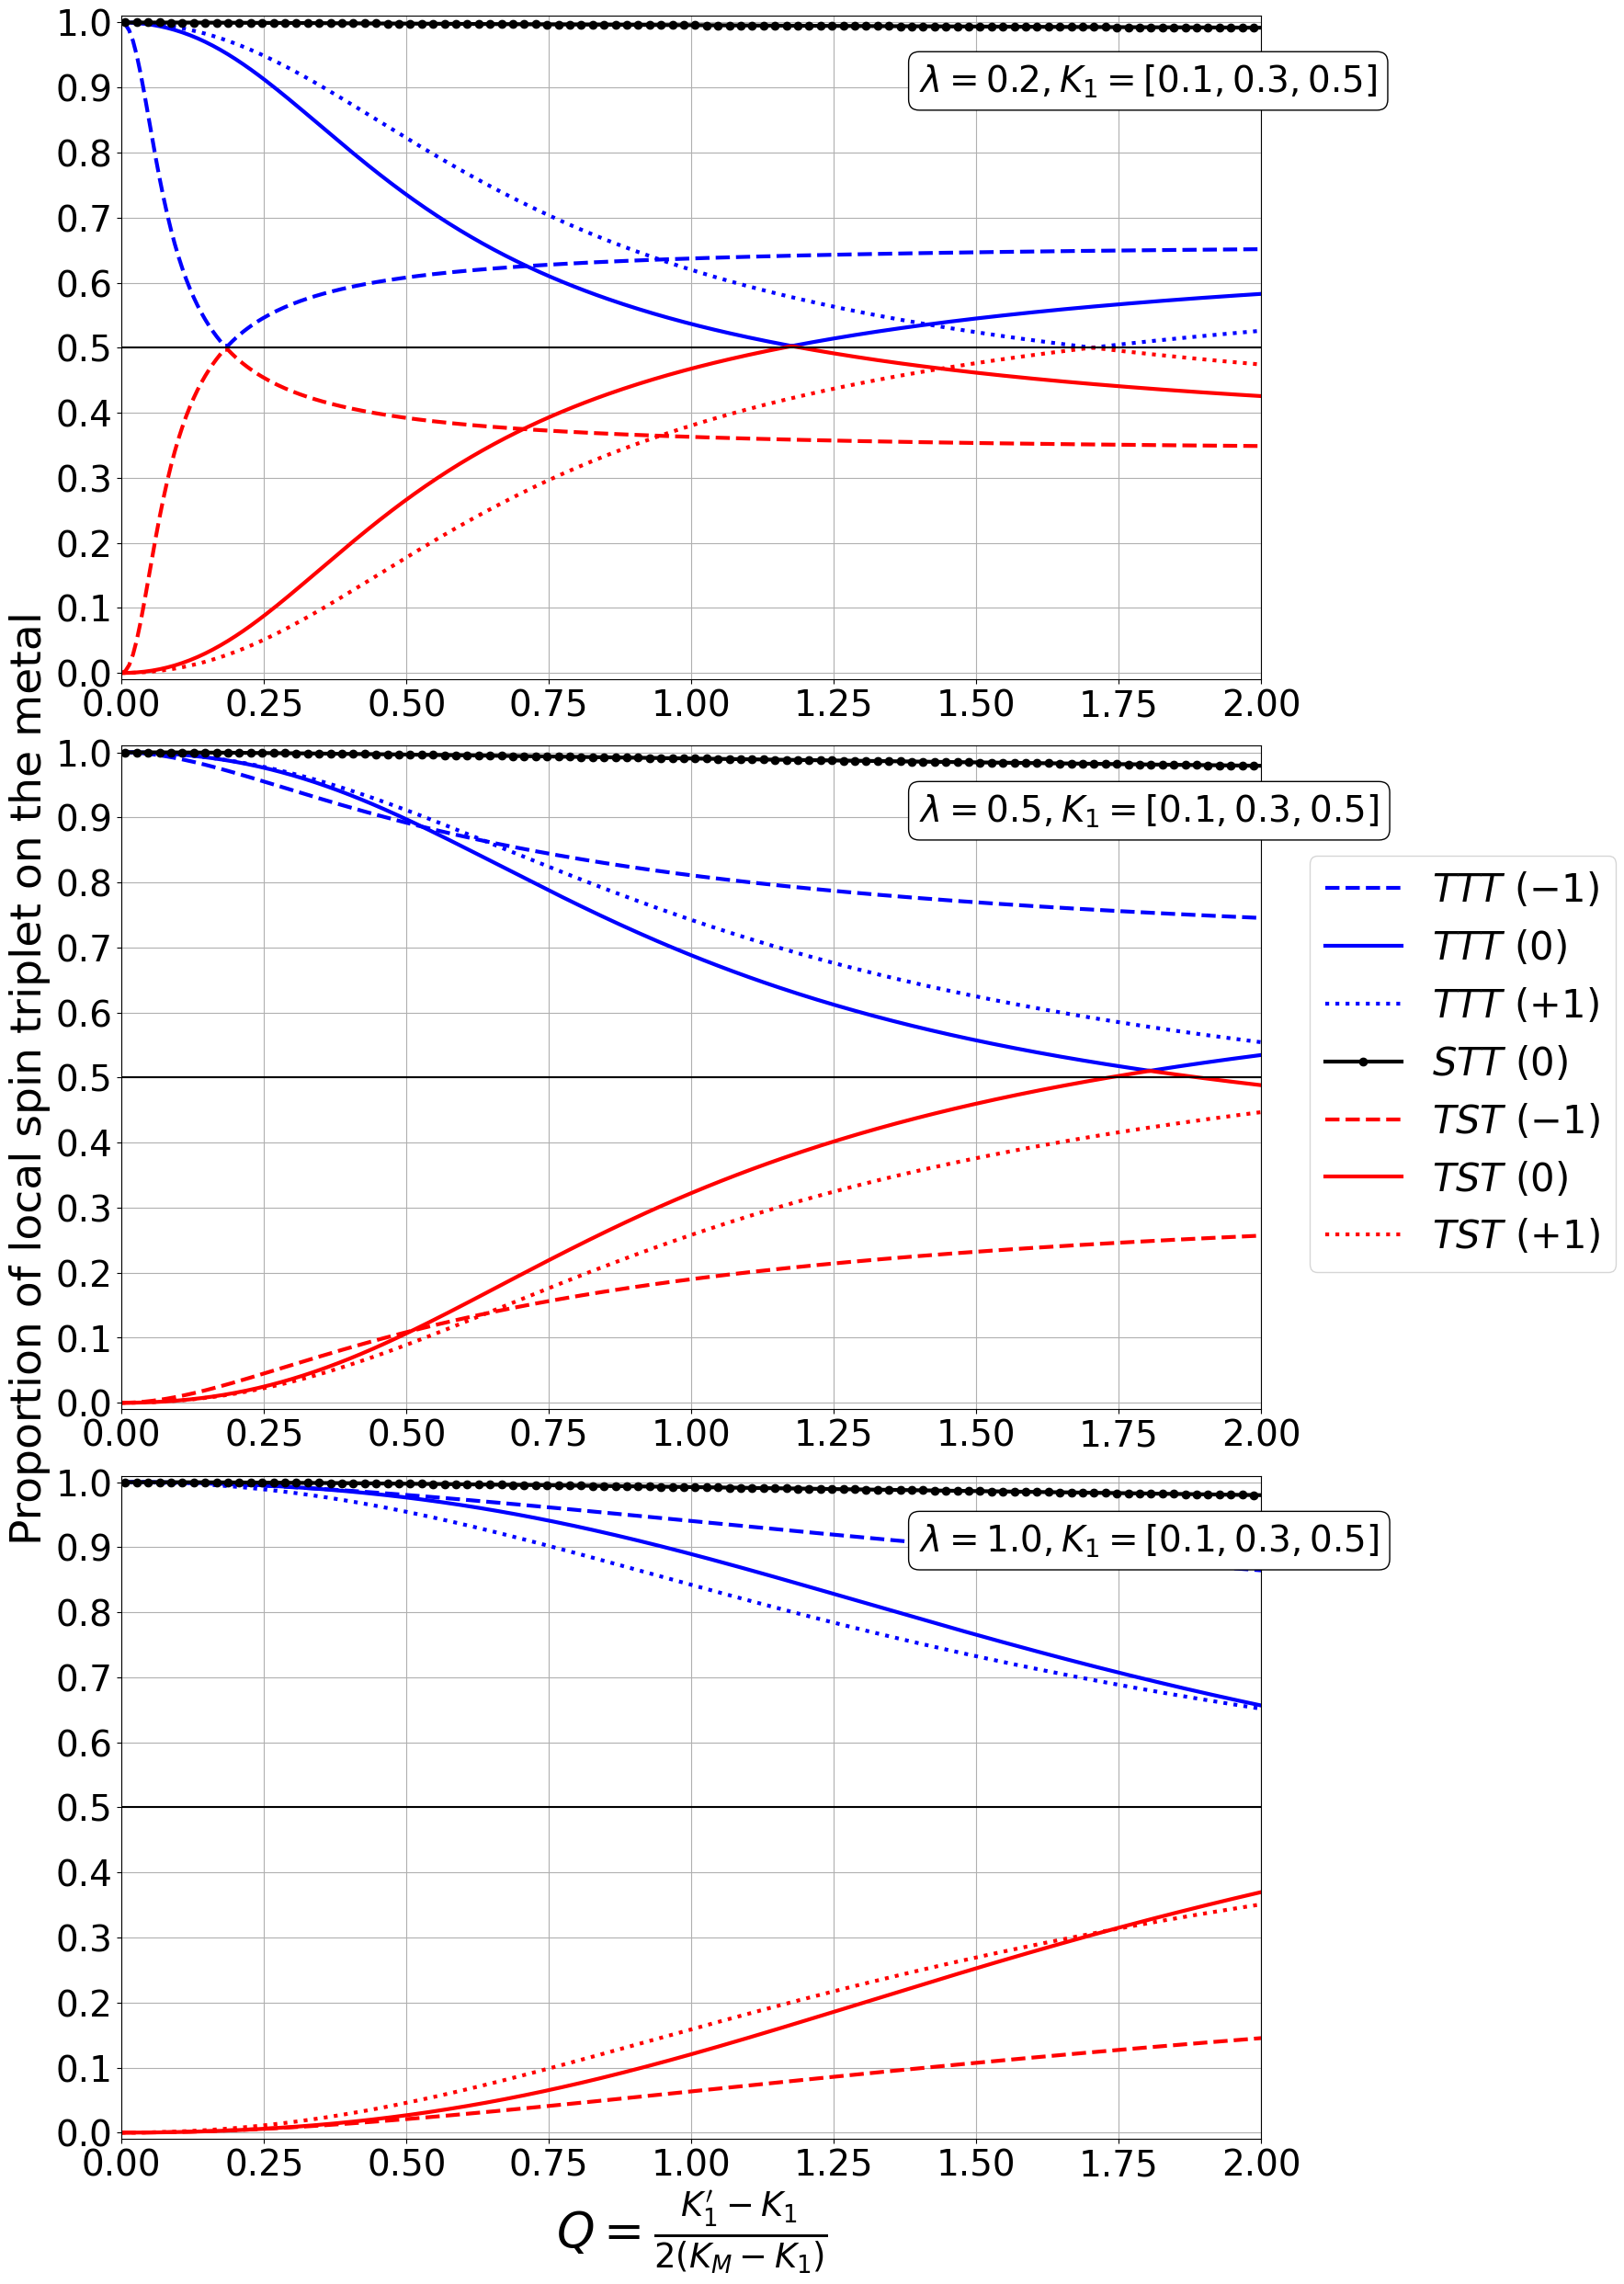

In [13]:
# Size of Figure
fig = plt.figure(figsize=(16,30))
gs = fig.add_gridspec(nrows=3, ncols=1,hspace=0.1,wspace=0.1)
ax = gs.subplots()

# Value of lambda (SOC)
lambd_val = np.array([0.2,0.5,1.0])

ymin=-0.01
ymax=1.01

size_linewidth = 3

# Minimum value of Q
xmin=0.
# Maximum value of Q
xmax=2.
# Number of steps
pas= xmax/300
# Variation of Q as a list
Q_var = [np.round(val,15) for val in np.arange(xmin,xmax+pas,pas)]

x_txt = [0.7,0.7,0.7]
y_txt = 0.93

ax[2].set_xlabel("$Q = \\frac{K_1^{\\prime} - K_1}{2(K_M-K_1)}$",fontsize=38)
ax[1].set_ylabel("Proportion of local spin triplet on the metal",fontsize=34)

states= [5,6,7,8,12,13,14]
for ax_idx_row in range(len(lambd_val)):
    lambd = lambd_val[ax_idx_row]
    textstr = "$\\lambda = "+str(lambd)+",K_1 ="+str(K_M0L2)+"$"
                                                            
    ax[ax_idx_row].text(x_txt[ax_idx_row],y_txt, textstr,transform=ax[ax_idx_row].transAxes, fontsize=28,
            verticalalignment='top',bbox=dict(boxstyle='round',facecolor='white'))
    
    ax[ax_idx_row].set_xlim([xmin, xmax])
    ax[ax_idx_row].set_ylim([-0.01, 1.01])
    ax[ax_idx_row].set_yticks(np.arange(0,1.01,0.1))
    
    y = Q_var
    # Size of lines
    size_linewidth = 3
    # Label of each state
    label_list = ["$QTT$ $(-2)$", "$QTT$ $(-1)$", "$QTT$ $(0)$", "$QTT$ $(+1)$", "$QTT$ $(+2)$", 
                  "$TTT$ $(-1)$", "$TTT$ $(0)$", "$TTT$ $(+1)$", 
                  "$STT$ $(0)$", 
                  "$TTS$ $(-1)$", "$TTS$ $(0)$", "$TTS$ $(+1)$", 
                  "$TST$ $(-1)$", "$TST$ $(0)$", "$TST$ $(+1)$", 
                  "$SSS$ $(0)$"]
    # Linestyle of each state
    linestyles = ["dashdot","dashed","solid","dotted","dashdot",
                  "dashed","solid","dotted",
                  "solid",
                  "dashed","solid","dotted",
                  "dashed","solid","dotted"]
    # Colors for TST, TTT and STT
    colors = []
    palette = ["black",
              "blue",
              "green",
              "red"]
    colors = [palette[0]]*5+[palette[1]]*3+[palette[0]]+[palette[2]]*3+[palette[3]]*3+[palette[0]]
    
    # Initialize the array for the eigenvalues
    all_energies = np.zeros((16,len(Q_var)))
    # Initialize the array for [m_s, S(S+1),%S_M=1,%S_L=1]
    all_proj_SPIN = np.zeros((len(all_energies),len(Q_var),4))
    K_list = []
    for Q_val in range(len(Q_var)):
        K_M1L2 = K_M1L3 = np.round(2*Q_var[Q_val]* (K_M0M1 - K_M0L2) + K_M0L2,15)
        K_list.append(K_M1L2)
        h_, g_ = build_basis(N_MO, index_metal, index_ligand,
                              h00,h11,h22,h33,
                              K_M0M1,K_L2L3,K_M0L2,K_M0L3,K_M1L2,K_M1L3,
                              U_M,U_L,t_M,t_L,t_ML)
        # Build the matrix representation of several interesting spin operators in the many-body basis  
        S_2, S_Z, S_p = qnb.fermionic.tools.build_s2_sz_splus_operator( a_dagger_a ) 
        # Build the matrix representation of the Hamiltonian operator
        H = qnb.fermionic.tools.build_hamiltonian_quantum_chemistry(
            h_, g_, nbody_basis, a_dagger_a)
        # Build the matrix representation of the Spin-Orbit Hamiltonian operator 
        H_SO = qnb.fermionic.tools.build_local_spinorbit_lz(a_dagger_a, list_mo_local,l_local, list_l_local)
        H_tot = H + lambd * H_SO
        
        eigval_SO, eigvec_SO = scipy.linalg.eigh( H_tot.toarray()  ) 
        # Specific function constructed by Pablo   
        all_energies, all_proj_SPIN = curve_analysis_spin(Q_val, all_energies, all_proj_SPIN, eigval_SO, eigvec_SO, 
                                            S_Z, S_2, Proj_triplet_metal, Proj_triplet_ligand,
                                            Op_penalty,penalty,use_index=True)

    x = all_proj_SPIN[:,:,2] #we want Proj_SM
    
    lines = []
    for i in states:
        if i == 8:
            line, = ax[ax_idx_row].plot(y,x[i],linestyle=linestyles[i], marker='o', color=colors[i],
                      linewidth=size_linewidth,
                      markevery=[j for j in range(len(y)) if j%((len(y)-1)/100) ==1])
        elif i == 15:
            line, = ax[ax_idx_row].plot(y,x[i],'x', color=colors[i])
        else:
            line, = ax[ax_idx_row].plot(y,x[i],linestyle=linestyles[i], color=colors[i],
                    linewidth=size_linewidth)
        lines += [line]
    print("lambda = "+str(lambd_val[ax_idx_row])+" generated")
    ax[ax_idx_row].axhline(y = 0.5, color = 'black', linestyle='-')
    # Legend
fig.legend(handles=lines,labels=[label_list[i] for i in states], 
                bbox_to_anchor=(0.92,0.5),
                loc='center left',
                fontsize=30)
# Save figure
plt.savefig("K1"+str(K_M0L2)+"variation_lambd_Proj_SM.pdf", bbox_inches='tight')

plt.show()

## Figure SI6: Eigenvalues of the total spin = f($\lambda$), $Q = 1.0$, $K_1 = 0.8$
Expectation values of the total spin operator $\hat{S}_{tot}$ of 10 of the 16 states as a function of $\lambda$. $Q = 1$, $\{m_{l_{M}};m_{l_{M'}}\} = \{-2,-1\}$ and $K_1 = 0.8$. For readability, the 6 remaining states $QTT$ ($\pm 2$), $TTS$ ($0$, $\pm 1$) and $SSS$ ($0$) are not shown because they keep a constant expectation value of, respectively, $6$, $2$ and $0$.

##### Parameters of Hamiltonian

In [14]:
# Number of MOs and of electrons
N_MO = N_elec = 4
dim_H  = math.comb( 2*N_MO, N_elec ) # Dimension of the many-body space 
# Index of the metal MOs
index_metal  = [ 0, 1 ]
# Index of the ligand MOs
index_ligand = [ 2, 3 ] 
#--- S.O.C parameters
# l_metal is the azimutal quantum number (1:p, 2:d, 3:f, 4:g)
l_metal = 2 
# metal_l are the local angular momentum of each MO on the metal
metal_l = [-2.,-1.0]
#---
# I rename the values to paste them into the code
list_mo_local, l_local, list_l_local = index_metal, l_metal, metal_l

#------------- GLOBAL -------------
# Build the many-body basis            
nbody_basis = qnb.fermionic.tools.build_nbody_basis( N_MO, N_elec )     
# Build the matrix representation of the a_dagger_a operator in the many-body basis                       
a_dagger_a  = qnb.fermionic.tools.build_operator_a_dagger_a( nbody_basis ) 
# Build the matrix representation of the global S2, S_z and S_plus spin operators in the many-body basis  
S2, S_Z, S_p = qnb.fermionic.tools.build_s2_sz_splus_operator( a_dagger_a )
#------------- LOCAL -------------
# Build the matrix representation of the local S2, S_z and S_plus spin operators (metal) in the many-body basis  
S2_metal, S_z_metal, S_plus_metal  = qnb.fermionic.tools.build_local_s2_sz_splus_operator( a_dagger_a, 
                                                                                          index_metal )
# Build the matrix representation of the local S2, S_z and S_plus spin operators (ligand) in the many-body basis  
S2_ligand, S_z_ligand, S_plus_ligand = qnb.fermionic.tools.build_local_s2_sz_splus_operator( a_dagger_a, 
                                                                                            index_ligand )
# Build the matrix representation of the local triplet projection (metal) in the many-body basis  
Proj_triplet_metal = qnb.fermionic.tools.build_spin_subspaces(S2_metal, 2)
# Build the matrix representation of the local triplet projection (ligand) in the many-body basis  
Proj_triplet_ligand = qnb.fermionic.tools.build_spin_subspaces(S2_ligand, 2)

# Build the matrix representation of the penalty operator: penalty applied to the doubly occupied determinants
penalty    = 1e3 
Op_penalty = scipy.sparse.csr_matrix((np.shape(nbody_basis)[0],np.shape(nbody_basis)[0]))
for p in range(0,N_MO): 
    Op_penalty += 1*((a_dagger_a[2*p,2*p]+a_dagger_a[2*p+1,2*p+1]) == 2)

#------------- PARAMETERS OF THE SYSTEM --------------
# Energy of each MO
h00,h11,h22,h33 = 0., 0.5, -1.0, -0.7   # metal, metal', ligand1, ligand2
# K_M, K_LL
K_M0M1, K_L2L3 = 1, 1e-5
# K_ML
K_M0L2 = K_M0L3 = 0.8
# K_M'L
K_M1L2 = K_M1L3 = 1.2
## U and t
U_M, U_L = 10., 10. 
t_M, t_L, t_ML = 0, 0, 0 
# Create the one- and two-electron matrices
h_, g_ = build_basis(N_MO, index_metal, index_ligand,
                     h00,h11,h22,h33,K_M0M1,K_L2L3,
                     K_M0L2,K_M0L3,K_M1L2,K_M1L3,
                     U_M,U_L,t_M,t_L,t_ML)
# Build the matrix representation of the Hamiltonian operator
H       = qnb.fermionic.tools.build_hamiltonian_quantum_chemistry(h_, g_, nbody_basis, a_dagger_a)

##### Calculation of the data for Figure SI6

In [15]:
# K_ML
K_M0L2 = K_M0L3 = 0.8
# K_M'L
K_M1L2 = K_M1L3 = 1.2 
Q = (K_M1L2 - K_M0L2) / (2*(K_M0M1 - K_M0L2))
# Build the matrix representation of the Spin-Orbit Hamiltonian operator 
H_SO = qnb.fermionic.tools.build_local_spinorbit_lz(a_dagger_a, list_mo_local,l_local, list_l_local)

# Log space
lambd_var = np.logspace(-2,2,num=100)

all_energies = np.zeros((16,len(lambd_var)))
all_proj_SPIN = np.zeros((len(all_energies),len(lambd_var),4))

for eps in range(len(lambd_var)):
    lambd = lambd_var[eps]
    H_tot = H + lambd * H_SO
    eigval_SO, eigvec_SO = scipy.linalg.eigh( H_tot.toarray()  ) 
    all_energies, all_proj_SPIN = curve_analysis_spin(eps, all_energies, all_proj_SPIN, eigval_SO, eigvec_SO, 
                                        S_Z, S2, Proj_triplet_metal, Proj_triplet_ligand,
                                        Op_penalty, penalty,use_index=True,)

##### Plotting of Figure SI6

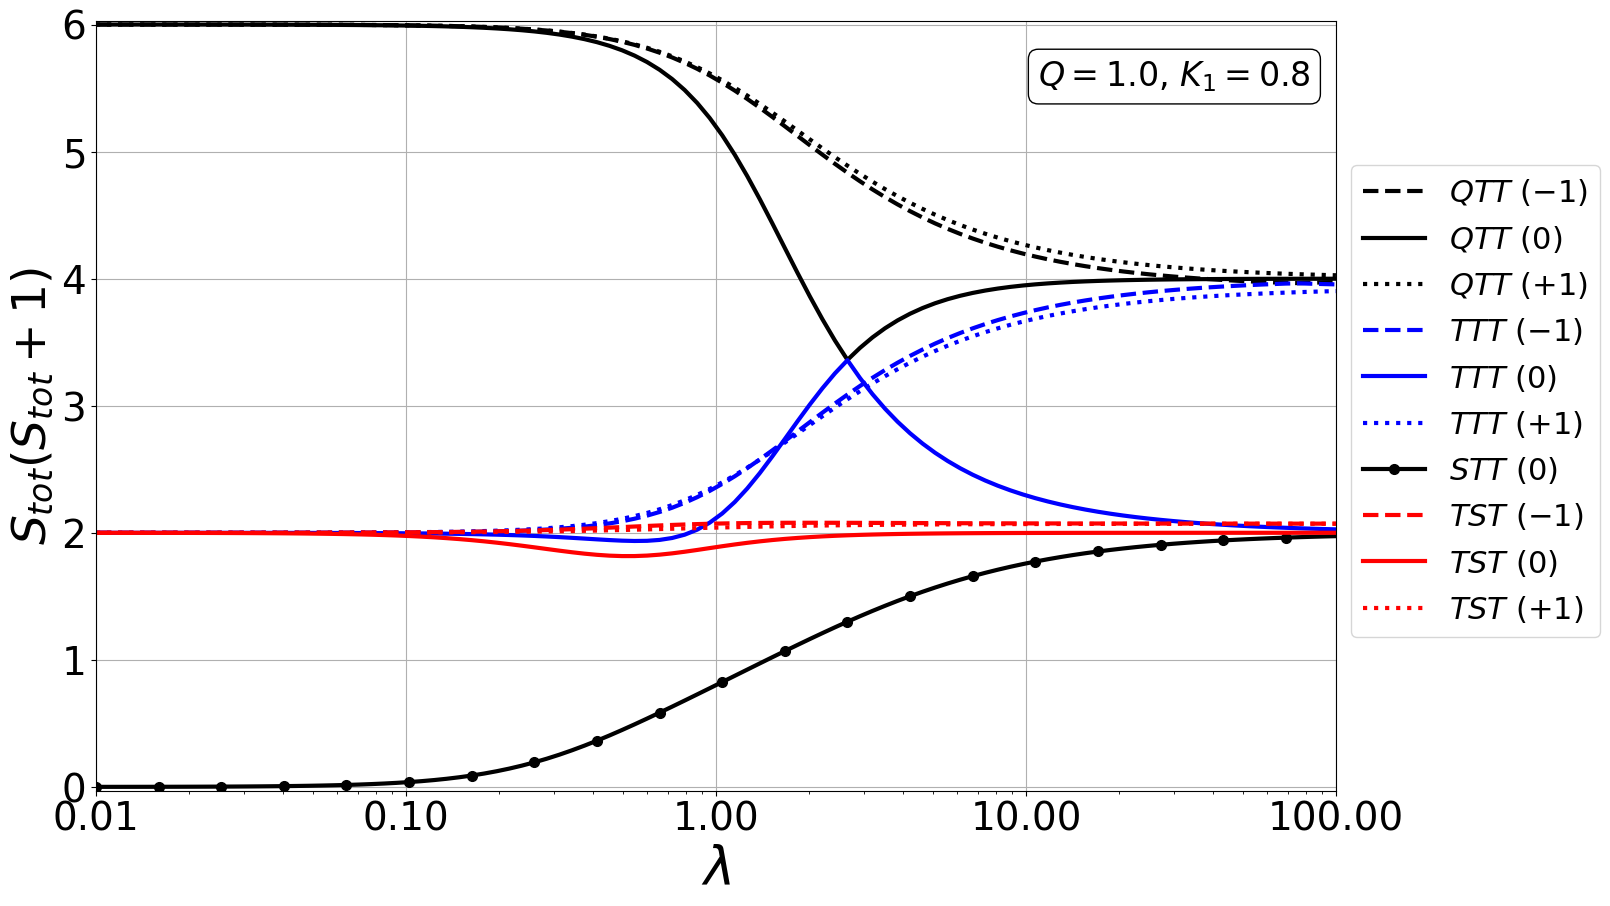

In [16]:
from matplotlib.ticker import ScalarFormatter

states = [5,6,7,
          8,
          12,13,14]
states = [1,2,3,5,6,7,8,12,13,14]
# states = [i for i in range(16)]

ytick_step = 0.1
size_linewidth = 3
# Size of Figure
fig = plt.figure(figsize=(16,10))
gs = fig.add_gridspec(nrows=1, ncols=1)
ax = gs.subplots()


# Show gridlines
ax.grid(True)
# Add a black horizontal at y = 0.5
# Save Figure
ax.set_ylim([-0.03, 6.03])
# ax.set_ylim([-0.03, 4.03])
ax.set_yticks(np.arange(0,6+.03,1))
# ax.set_yticks(np.arange(0,4+.03,1))
# Title of Figure
# Text box inside the graph
textstr = "$Q = "+str(np.round(Q,7))+"$, $K_1 = "+str(np.round(K_M0L2,6))+"$"
# ax.text(0.76,0.95, textstr,transform=ax.transAxes, fontsize=24,
ax.text(0.76,0.95, textstr,transform=ax.transAxes, fontsize=24,
        verticalalignment='top',bbox=dict(boxstyle='round',facecolor='white'))
# Set x and y axis limits
ax.set_xlim([0.1, 100])
# ax.set_xscale('log')
ax.set_xticks([0.1,1,10,100])



# Labels of x and y axis
ax.set_xlabel("$\\lambda$",fontsize=38)
ax.set_ylabel("$S_{tot}(S_{tot}+1)$",fontsize=34)

# Labels of each state
label_list = ["$QTT$ $(-2)$", "$QTT$ $(-1)$", "$QTT$ $(0)$", "$QTT$ $(+1)$", "$QTT$ $(+2)$", 
              "$TTT$ $(-1)$", "$TTT$ $(0)$", "$TTT$ $(+1)$", 
              "$STT$ $(0)$", 
              "$TTS$ $(-1)$", "$TTS$ $(0)$", "$TTS$ $(+1)$", 
              "$TST$ $(-1)$", "$TST$ $(0)$", "$TST$ $(+1)$", 
              "$SSS$ $(0)$"]
# Linestyle of each state
linestyles = ["dashdot","dashed","solid","dotted","dashdot",
              "dashed","solid","dotted",
              "solid",
              "dashed","solid","dotted",
              "dashed","solid","dotted"]
# Color of each state
colors = ["black","black","black","black","black",
          "blue","blue","blue",
          "black",
          "green","green","green",
          "red","red","red",
          "black"]


# x: Proj_SM; y: variations of Q
x = all_proj_SPIN[:,:,1] #we want S(S+1)
y = lambd_var


# Store the label of shown states
final_label_list = []
lines = []
for i in states:
    if i == 8:
        line, =ax.semilogx(y,x[i],linestyle=linestyles[i], marker='o', color=colors[i],
                 linewidth=size_linewidth,markersize=7,
                 markevery=[j for j in range(len(y)) if j%5 ==0])
        final_label_list.append(label_list[i])
    elif i == 15:
        line, =ax.semilogx(y,x[i],'x', color=colors[i],markersize=10,
                    markevery=[j for j in range(len(y)) if j%5 ==0])
        final_label_list.append(label_list[i])
    else:
        line, =ax.semilogx(y,x[i],linestyle=linestyles[i], color=colors[i],
                 linewidth=size_linewidth)
        final_label_list.append(label_list[i])
    lines += [line]
# Legend
fig.legend(handles=lines,labels=final_label_list, bbox_to_anchor=(0.9,0.5),loc='center left')

ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xticks([0.01,0.1,1,10,100])
name_file = "Q_"+str(np.round(Q,7))+"K1_"+str(K_M0L2)+"_Proj_S2_var_lambda.pdf"


plt.savefig(name_file, bbox_inches='tight')
# Show Figure in Spyder
plt.show()